<h1>Time Series Data Analysis & Modeling with Python</h1>

In [322]:
stocks5_df = pd.read_csv( 'datasets/5_stocks.csv', parse_dates= ['Date'], index_col= 'Date'  ).dropna()
stocks5_df.columns = clean_colm_name( stocks5_df )
stocks5_df

aapl    amzn     ibm    wmt    xom
Date                                            
2001-07-06    1.57   15.27  106.50  47.34  43.40
2001-07-09    1.62   15.81  104.72  48.25  43.36
2001-07-10    1.51   15.61  101.96  47.50  42.88
...            ...     ...     ...    ...    ...
2017-05-26  153.61  995.78  152.49  78.13  81.55
2017-05-30  153.67  996.70  151.73  78.15  81.10
2017-05-31  152.76  994.62  152.63  78.60  80.50

[3999 rows x 5 columns]

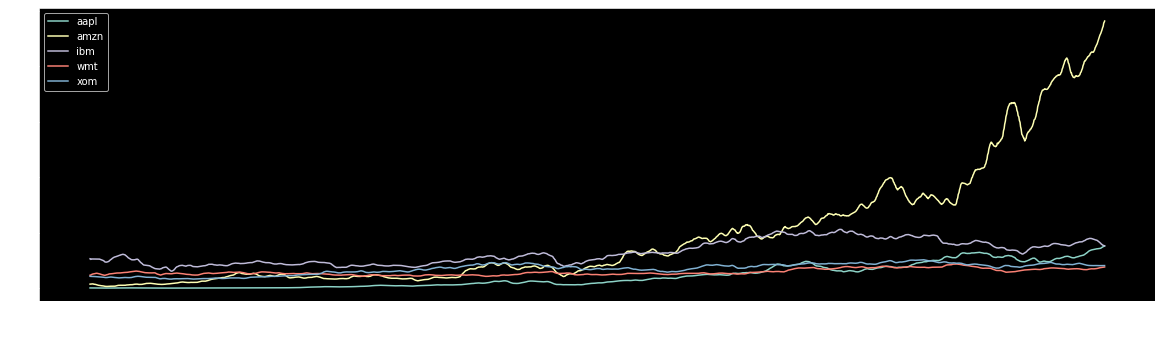

In [323]:
# rolling mean

stocks5_M_df =  stocks5_df.rolling( window= '30D' ).mean()
stocks5_M_df.plot( figsize= (20,6) );

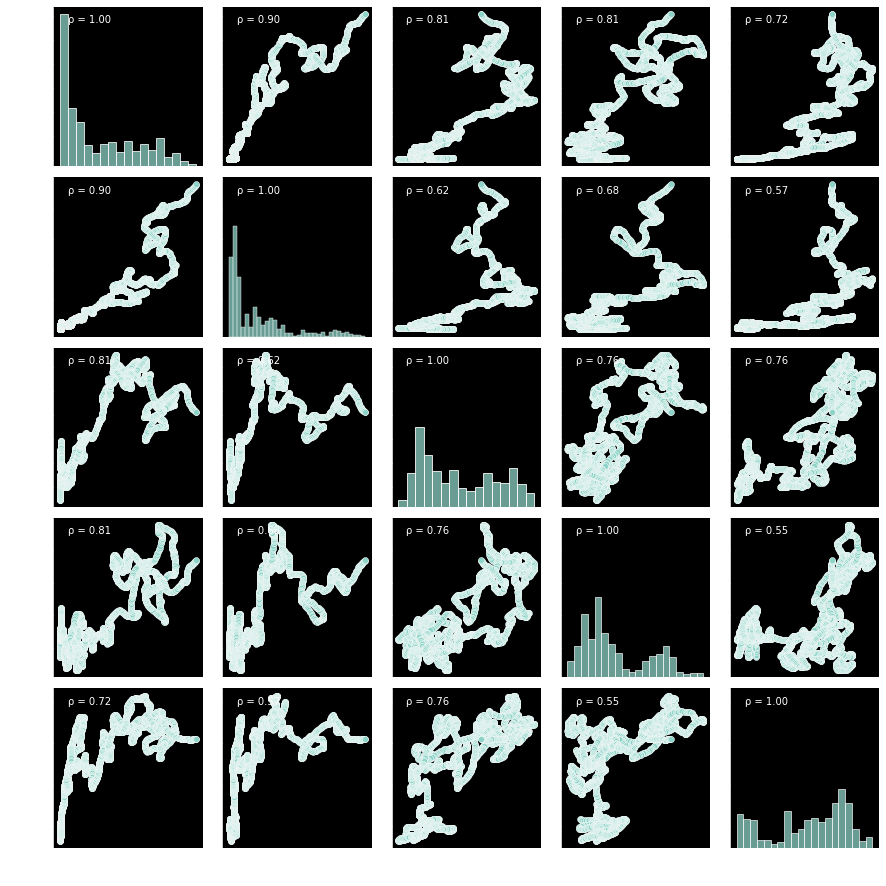

          aapl      amzn       ibm       wmt       xom
aapl  1.000000  0.899247  0.805708  0.807136  0.724093
amzn  0.899247  1.000000  0.619019  0.681321  0.572974
ibm   0.805708  0.619019  1.000000  0.762782  0.757065
wmt   0.807136  0.681321  0.762782  1.000000  0.553726
xom   0.724093  0.572974  0.757065  0.553726  1.000000


In [324]:
# udf: function to mention Correlation value as a text in the plots

def corrValue( x,y, ax= None, **kws ):
    r_val,_ = np.corrcoef(x,y)
    ax = ax or plt.gca()
    ax.text( 0.1,0.9, s= f'ρ = {r_val[1]:.2f}', transform= ax.transAxes,  )

fctGrd1 = sns.pairplot( data= stocks5_M_df )
fctGrd1.map( corrValue )
plt.show()

print( stocks5_M_df.corr() )

#### Correlations on the percentage changes

The correlations on the percentage changes rather than the stock price makes more sense.

In [325]:
stocks5_pct_df = stocks5_M_df.resample('M').mean().pct_change().dropna()
stocks5_pct_df.corr()

aapl      amzn       ibm       wmt       xom
aapl  1.000000  0.406720  0.442085  0.188001  0.358264
amzn  0.406720  1.000000  0.352117  0.140917  0.138260
ibm   0.442085  0.352117  1.000000  0.269117  0.294815
wmt   0.188001  0.140917  0.269117  1.000000  0.159624
xom   0.358264  0.138260  0.294815  0.159624  1.000000

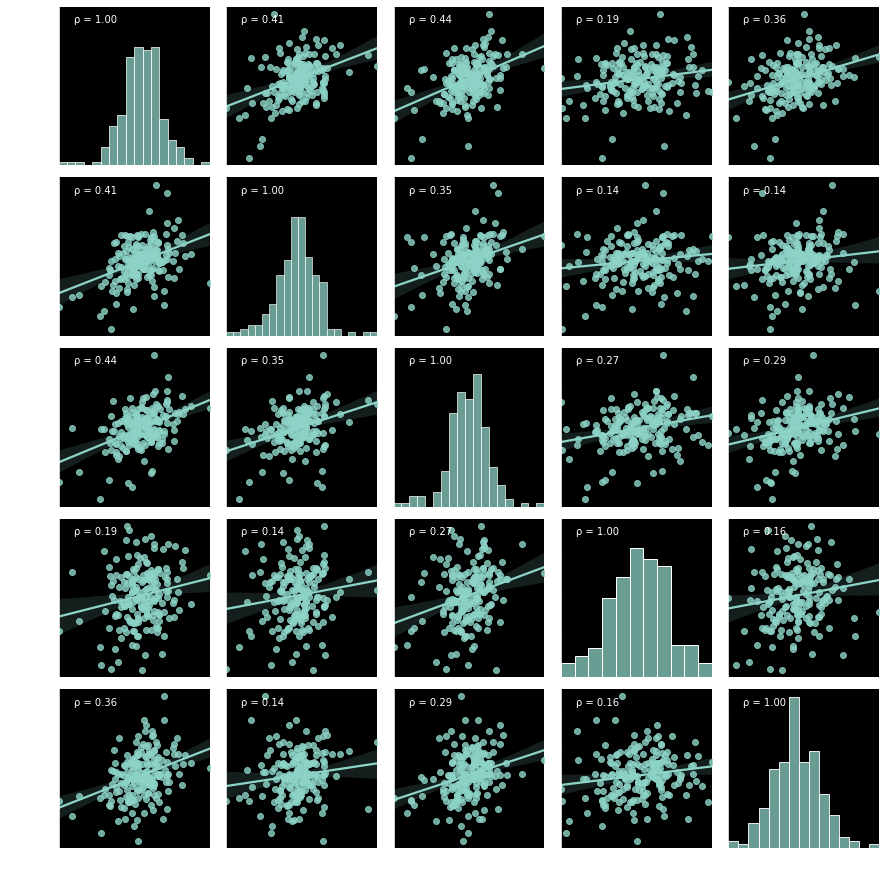

In [326]:
fctGrd1 = sns.pairplot( data= stocks5_pct_df, kind= 'reg' );
fctGrd1.map( func= corrValue );

<br>

### Simple Linear Regression on Time-Series

Correlation betwwen Apple & IBM stock: 0.8057077464403785

            const      aapl
Date                       
2001-07-06    1.0  1.570000
2001-07-09    1.0  1.595000
2001-07-10    1.0  1.566667


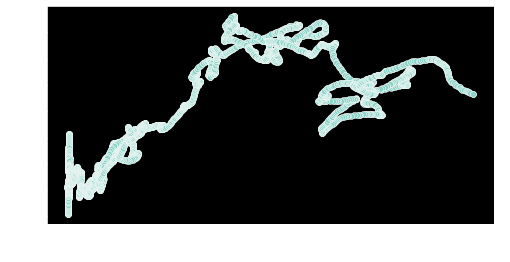

In [341]:
import statsmodels.api as sm

print( f"Correlation betwwen Apple & IBM stock: {stocks5_M_df['aapl'].corr( stocks5_M_df['ibm'] )}\n" )

xx = stocks5_M_df['aapl']

# add intercept value = 1, else regressiopn will be for y = mx
xx = sm.add_constant( xx )

yy = stocks5_M_df['ibm']; print( xx.head(3) )

fig,ax = plt.subplots( figsize= (8,4) )
sns.scatterplot( x= xx['aapl'], y= yy ); plt.show()

In [342]:
reg_result = sm.OLS( yy, xx ).fit()

print( reg_result.summary() )

                            OLS Regression Results                            
Dep. Variable:                    ibm   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     7396.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:42:23   Log-Likelihood:                -18513.
No. Observations:                3999   AIC:                         3.703e+04
Df Residuals:                    3997   BIC:                         3.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.4981      0.562    168.025      0.0

<br>

<h3>Autocorrelation aka Serial Correlation</h3>     

In [8]:
msft_df = pd.read_csv( 'datasets/MSFT.csv')
msft_df.columns = clean_colm_name(msft_df)

# datetime mgmt
msft_df.index = pd.to_datetime( msft_df['date'] )
msft_df.drop( 'date', axis= 1, inplace= True )

msft_df

adj_close
date                 
2012-08-06  26.107651
2012-08-07  26.377876
2012-08-08  26.438896
...               ...
2017-08-02  72.260002
2017-08-03  72.150002
2017-08-04  72.680000

[1258 rows x 1 columns]

            adj_close
date                 
2012-08-19   0.011543
2012-08-26   0.004599
2012-09-02   0.001374
2012-09-09   0.004833
2012-09-16   0.003835

The Autocorrelation with 1 week lag = 0.052


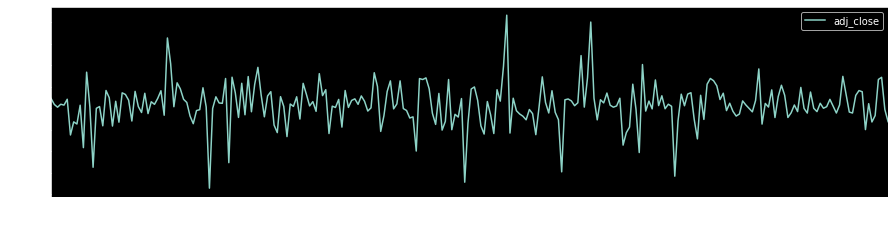

In [9]:
# get mean weekly prices and then compute returns from prices

msft_W_pct_df = msft_df.resample('W').mean().pct_change().dropna()
print( msft_W_pct_df.head() )

msft_W_pct_Autocorr_df = msft_W_pct_df['adj_close'].autocorr()

print( f'\nThe Autocorrelation with 1 week lag = {msft_W_pct_Autocorr_df:.3f}' )

msft_W_pct_df.plot( figsize= (15,3.5) );

#### Autocorelation of a data over various time period average

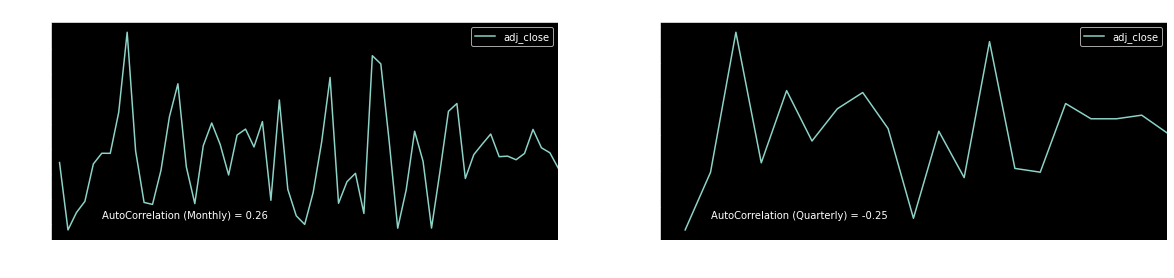

In [10]:
msft_M_pct_df = msft_df.resample('M').mean().pct_change()
msft_M_pct_AutoCorr = msft_M_pct_df['adj_close'].autocorr()

msft_Q_pct_df = msft_df.resample('Q').mean().pct_change()
msft_Q_pct_AutoCorr = msft_Q_pct_df['adj_close'].autocorr()

fg, (ax1,ax2) = plt.subplots( 1,2, figsize= (20,4) )

msft_M_pct_df.plot( ax= ax1 )
ax1.set_title('Average Monthly Percentage return')
ax1.text( 0.1,0.1, s= f'AutoCorrelation (Monthly) = {msft_M_pct_AutoCorr:.2f}', transform= ax1.transAxes )

msft_Q_pct_df.plot( ax= ax2 ); ax2.set_title('Average Quaterly Percentage return')
ax2.text( 0.1,0.1, s= f'AutoCorrelation (Quarterly) = {msft_Q_pct_AutoCorr:.2f}', transform= ax2.transAxes )

plt.show()

##### The Autocorrelation can also be done on the difference (instead of percent change)

In [1799]:
msft_M_diff_df

adj_close
date                 
2012-08-31        nan
2012-09-30       -0.9
2012-10-31       -1.1
...               ...
2017-06-30       -0.9
2017-07-31        3.8
2017-08-31       -0.0

[61 rows x 1 columns]

c:\python-projects\machine-learning\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


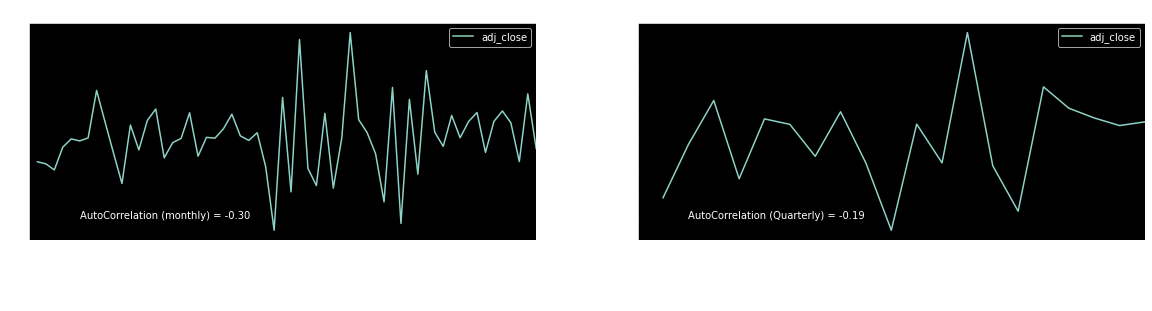

In [88]:
msft_M_diff_df = msft_df.resample('M').last().diff()
msft_M_diff_AutoCorr = msft_M_diff_df['adj_close'].autocorr()

msft_Q_diff_df = msft_df.resample('Q').last().diff()
msft_Q_diff_AutoCorr = msft_Q_diff_df['adj_close'].autocorr()

fg, (ax1,ax2) = plt.subplots( 1,2, figsize= (20,4) )

msft_M_diff_df.plot( ax= ax1 )

ax1.set_title('Average Monthly Percentage return')
ax1.text( 0.1,0.1, s= f'AutoCorrelation (monthly) = {msft_M_diff_AutoCorr:.2f}', transform= ax1.transAxes )
ax1.set_xticklabels( labels= msft_M_diff_df.index.values, rotation= 70 )
ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%m-%Y') )
ax1.xaxis.set_minor_formatter( matplotlib.dates.DateFormatter('%m-%Y') )

msft_Q_diff_df.plot( ax= ax2 ); ax2.set_title('Average Quaterly Percentage return')
ax2.text( 0.1,0.1, s= f'AutoCorrelation (Quarterly) = {msft_Q_diff_AutoCorr:.2f}', transform= ax2.transAxes )

plt.show()

Notice how the weekly autocorrelation is small but the monthyl/quarterly autocorrelation is large and negative.

<br>
<h3> Autocorrelation Function</h3>     

#### Compute the ACF

            Earnings
Quarter             
2007-01-01     -0.36
2007-04-01     -0.38
2007-07-01      0.07


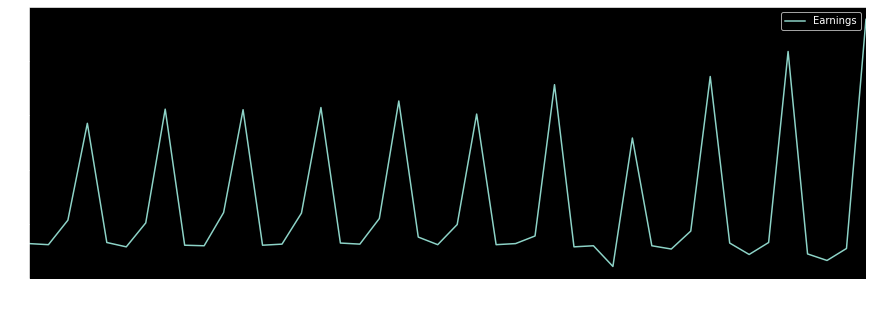

In [345]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

hrb_df = pd.read_csv( 'datasets/HRB.csv', parse_dates= ['Quarter'], index_col= 'Quarter' )

hrb_df.plot( figsize= (15,5) );
print( hrb_df.head(3) )

In [346]:
# Compute the acf array of HRB

acf_hrb = acf( hrb_df, nlags= 41 )
print( acf_hrb )

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029  0.00541282]


c:\python-projects\machine-learning\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


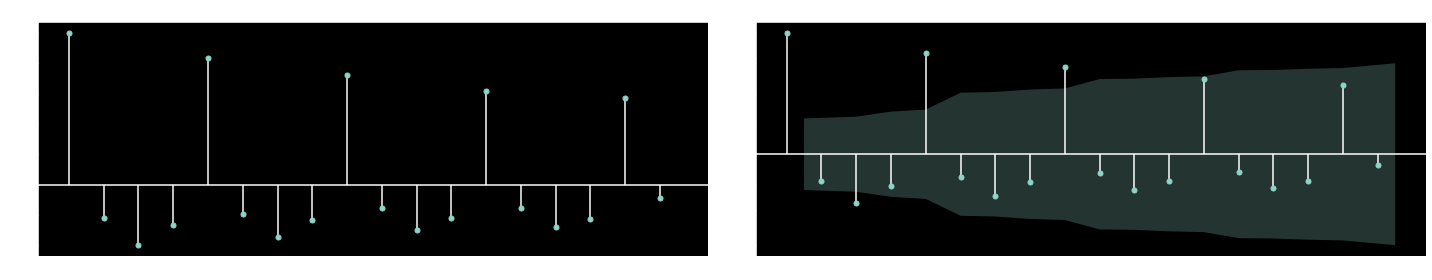

In [359]:
# Plot the acf function with no CI
fg, (ax1,ax2) = plt.subplots( 1,2, figsize= (20,4) )

plot_acf( hrb_df, ax= ax1, alpha= 1 );        plot_acf( hrb_df, alpha= 0.05, ax= ax2 );

plt.tight_layout()

Notice the strong positive autocorrelation at lags 4, 8, 12, 16, 20, ...

<br>

### AutoCorrelation with CI

            adj_close
date                 
2012-08-31        NaN
2012-09-30  -0.930132
2012-10-31  -1.070524

The autocorrelation of weekly MSFT diff returns is -0.30
The approximate confidence interval is +/- 0.25


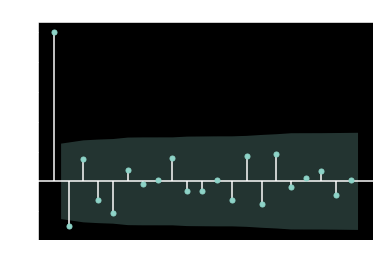

In [112]:
msft_M_diff_df
print( msft_M_diff_df.head(3) )

msft_M_diff_AutoCorr = msft_M_diff_df['adj_close'].autocorr()
print( '\nThe autocorrelation of weekly MSFT diff returns is %.2f' %(msft_M_diff_AutoCorr) )

num_obs = len( msft_M_diff_df )

# Compute the approximate confidence interval

aautoCorr_CI = 1.96/np.sqrt(num_obs)
print( 'The approximate confidence interval is +/- %.2f' %(aautoCorr_CI) )

# Plot the autocorrelation function with 95% confidence intervals and 20 lags
plot_acf( x= msft_M_diff_df.dropna(), alpha= 0.05, lags= 20 );

Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero.

<br>

<h3>White Noise</h3>     


The mean is 1.736 and the standard deviation is 4.952


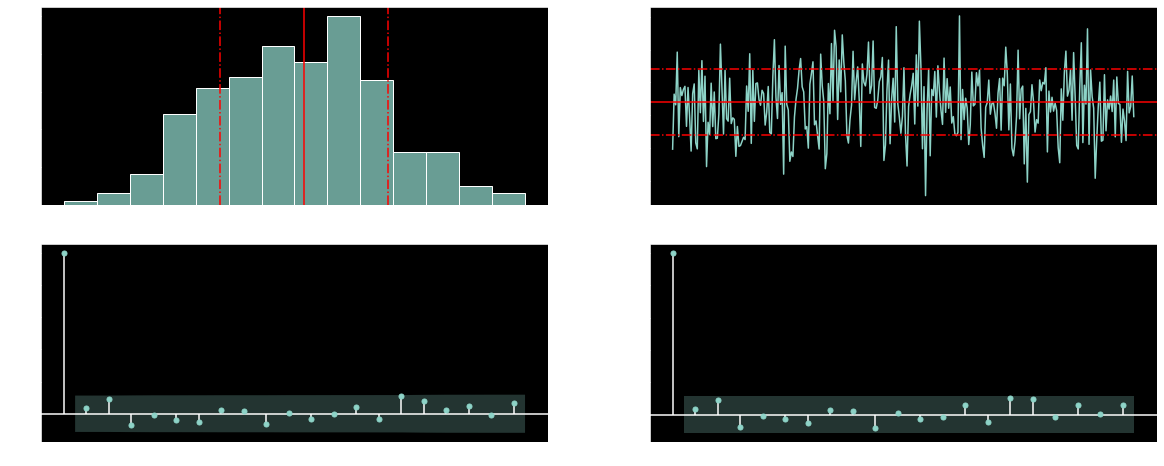

In [362]:
# Simulate white noise pct returns

pct_returns = np.random.normal( loc= 2, scale= 5, size= 300 )   # <-- mean = 2, SD = 5

print( 'The mean is %.3f and the standard deviation is %.3f' %( np.mean(pct_returns),np.std(pct_returns) ) )

fg,ax = plt.subplots( 2,2, figsize= (20,8) )

sns.histplot( x= pct_returns, ax= ax[0][0] )
ax[0][0].axvline( x= 2, color= 'red', linestyle= '-' )
ax[0][0].axvline( x= 2-5, color= 'red', linestyle= '-.' ); ax[0][0].axvline( x= 2+5, color= 'red', linestyle= '-.' )


ax[0][1].plot( pct_returns ); 
ax[0][1].axhline( y= 2, color= 'red', linestyle= '-' )
ax[0][1].axhline( y= 2-5, color= 'red', linestyle= '-.' ); ax[0][1].axhline( y= 2+5, color= 'red', linestyle= '-.' )

# Plot autocorrelation function of white noise returns
plot_acf( x= pct_returns, lags= 20, ax= ax[1][0] )
plot_pacf( x= pct_returns, lags= 20, ax= ax[1][1] )


plt.show()


Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help  forecast the future.

<br>
<h3>Random Walk</h3>

In [196]:
# Generate 1000 random differenc with mean = 0 and SD = 1 
diff = np.random.normal( loc= 0, scale= 1, size= 300 )

# Set first element to 0 so that the first price will be the starting stock price
diff[0] = 0

# Simulate stock prices, with a starting price of 100
stock_price = 100 + np.cumsum( diff )

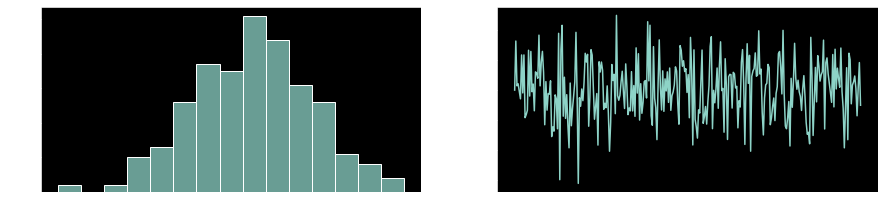

In [197]:
# random diff plots

fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (15,3.4) )

sns.histplot( diff, ax= ax1 )
ax2.plot( diff )

plt.show()

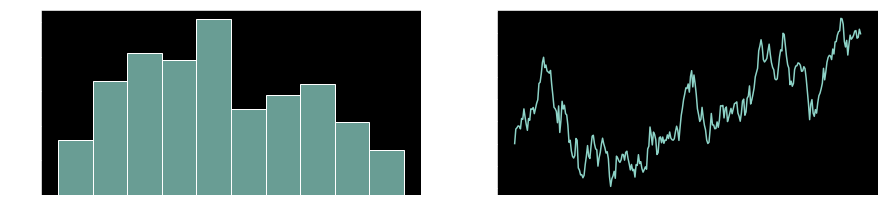

In [198]:
# random stock price (cumulative diff) plots

fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (15,3.4) )

sns.histplot( stock_price, ax= ax1 )
ax2.plot( stock_price )

plt.show()

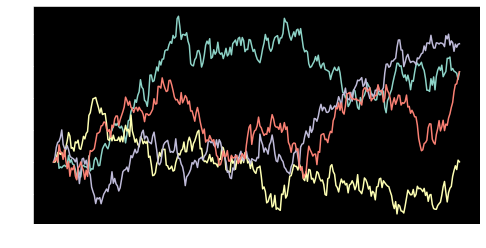

In [204]:
fg,ax = plt.subplots( figsize= (8,4) )

num = 4
for _ in range(num):
    diff = np.random.normal( loc= 0, scale= 1, size= 300 )
    diff[0] = 0
    stock_price = 100 + np.cumsum( diff )    
    ax.plot( stock_price )

The simulated price series closely resemble a random walk.

<br>

#### Drift

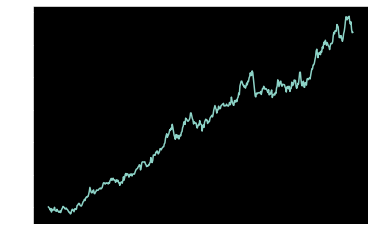

In [4]:
# Generate 500 (normal) random  multiplicative 'steps/difference' with mean 0.1% and standard deviation 1% using 
mu = 1.00001

diff = np.random.normal( loc= .1/100, scale= 1/100, size= 500 ) + mu

diff[0] = 1              #  <-- Set first element to 1

# Simulate stock prices, with a starting price of 100
stock_price = 100 * np.cumprod( diff )

plt.plot(stock_price);

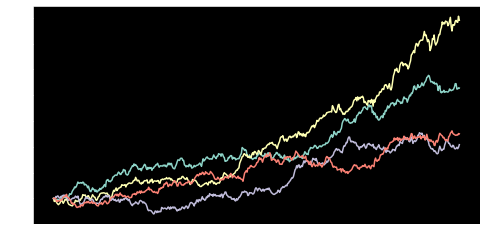

In [5]:
mu = 1.00001; num = 4

fg,ax = plt.subplots( figsize= (8,4) )

for _ in range(num):
    
    diff = np.random.normal( loc= .1/100, scale= 1/100, size= 500 ) + mu
    diff[0] = 1
    stock_price = 100 * np.cumprod( diff )

    ax.plot( stock_price)

This plotted simulated price series  closely resemble a random walk for a high flying stock.

#### Are Stock Prices a Random Walk?

With the ADF test, the `Null Hypothesis (Ho)` is that the series follows a random walk. Therefore, a low p-value (say < 5%) means we can accepts `Alternate Hypothesis (Ha)` and reject the `Null Hypothesis (Ho)`. Thus, the series is a not a Random Walk.

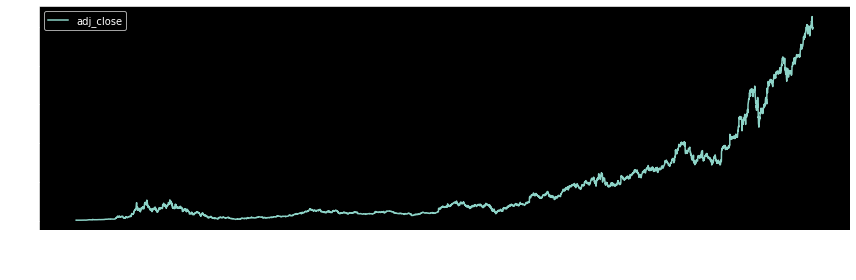

In [364]:
from statsmodels.tsa.stattools import adfuller

amzn_df = pd.read_csv( 'datasets/AMZN.csv', parse_dates= ['Date'], index_col= 'Date' )
amzn_df.columns = clean_colm_name( amzn_df )

fg,ax = plt.subplots( figsize= (12,4) )
amzn_df.plot( ax= ax ); plt.tight_layout()

In [9]:
# Run the ADF test on the price series and print out the results

dickeyFullerAugm_test = adfuller( x= amzn_df['adj_close'] )

print( f'The p-value of the test on prices is: {dickeyFullerAugm_test[1]}\n\
The t-value of the test on prices is: {dickeyFullerAugm_test[0]:.2f}' )

dickeyFullerAugm_test

The p-value of the test on prices is: 1.0
The t-value of the test on prices is: 4.03


(4.025168525770744,
 1.0,
 33,
 5054,
 {'1%': -3.4316445438146865,
  '5%': -2.862112049726916,
  '10%': -2.5670745025321304},
 30308.64216426981)

According to this test, we accept `null hypothesis (Ho)` and reject the `alternate hypothesis (Ha)`.

<br>

#### Random walk with Draft test on - Stock Returns

Above, it is apparent that the Amazon stock prices follow a random walk. Now let's conduct same test for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

In [365]:
# calc AMZN percent change of prices

amzn_pct_df = amzn_df.pct_change().dropna()
amzn_pct_df

# Run the ADF test on the price series and print out the results

dickeyFullerAugm_test = adfuller( x= amzn_pct_df['adj_close'] )

print( f'The p-value of the test on prices is: {dickeyFullerAugm_test[1]}\n\
The t-value of the test on prices is: {dickeyFullerAugm_test[0]:.2f}' )

dickeyFullerAugm_test

The p-value of the test on prices is: 2.565589808348712e-22
The t-value of the test on prices is: -12.05


(-12.053453021869645,
 2.565589808348712e-22,
 33,
 5053,
 {'1%': -3.431644800138127,
  '5%': -2.86211216296977,
  '10%': -2.567074562815631},
 -18483.377508750207)

The p-value is extremely small, so we can easily reject the Ho - Null Hypothesis, and accepts Ha: return are not a random walk but is a Sationarity.

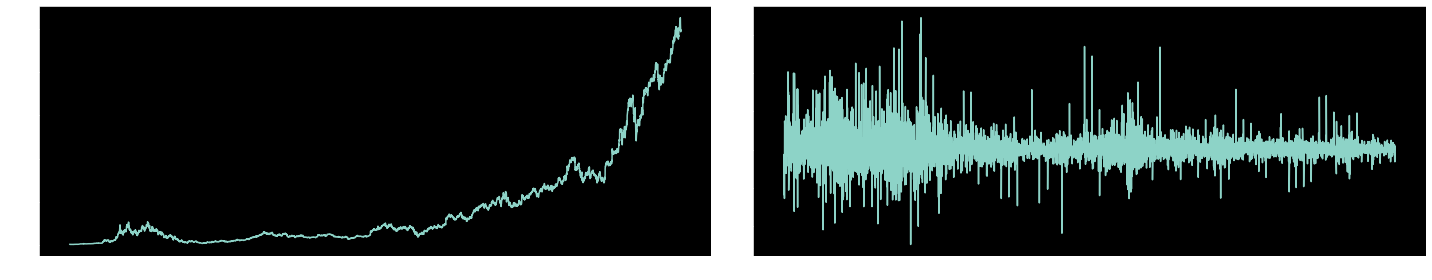

In [368]:
fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (20,4) ) 

ax1.plot( amzn_df )  ;                                       ax2.plot( amzn_pct_df )
plt.tight_layout()

<br>
<h3>Stationarity vs Random Walk: with Dickey Fuller Test</h3>     



#### `Stationarity` vs `Random Walk` 

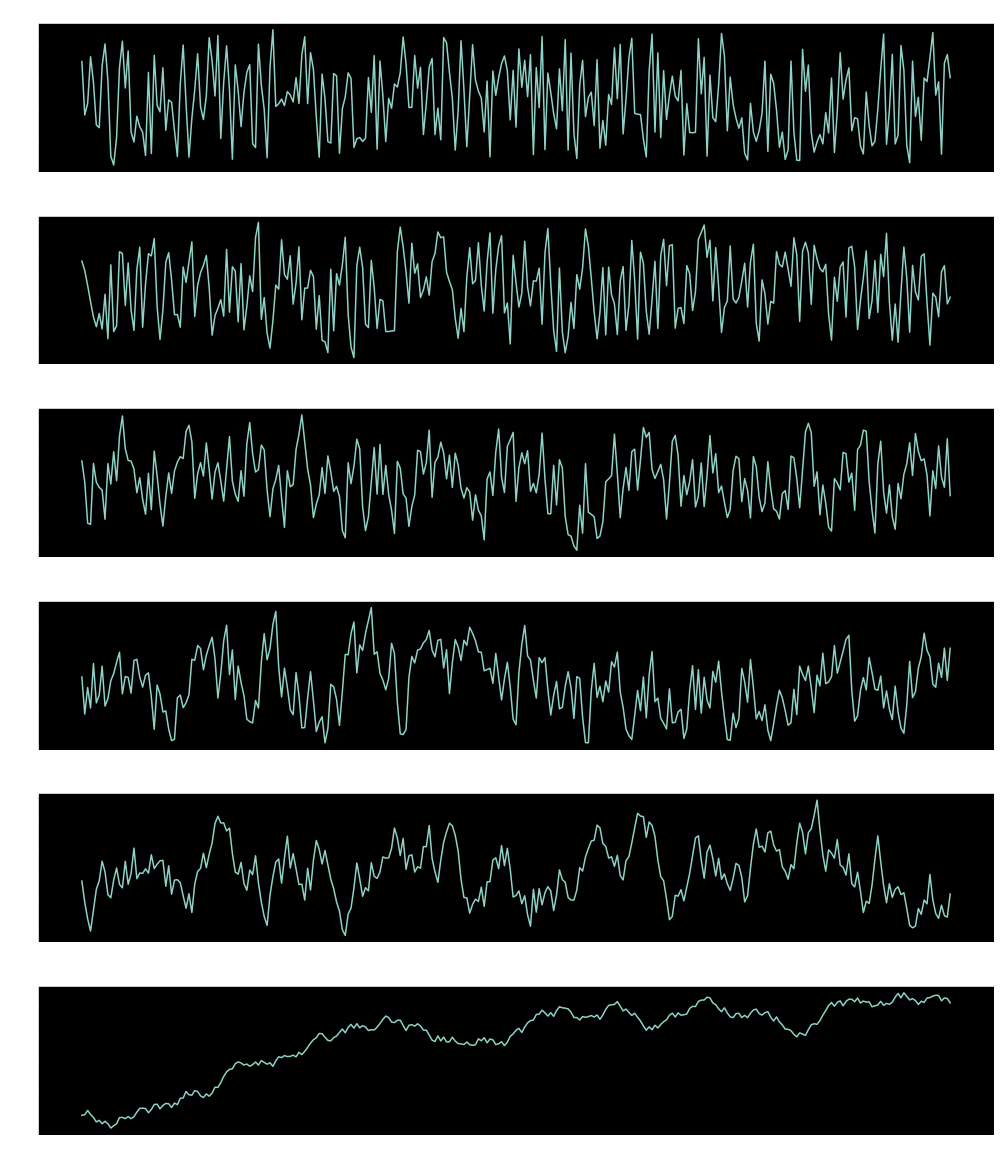

In [178]:
# simultaing the Stationary & Random Walk data
    
µ = 0.2; tm = 300
phi_ls = np.linspace( 0.1,0.99, 6 ).tolist();  n_row = len( phi_ls )

fg,ax = plt.subplots( nrows= n_row, ncols=  1, figsize= (14,2.7*n_row) )  

for idx, (φ,e_ax) in enumerate( zip( phi_ls,ax.flatten() ) ):
    np.random.seed(10);     
    yt = [ np.random.rand() ]; 
    
    for e_tm in range( tm ):
        𝜀t = random.uniform(-1,1)        
        
        yt.append( µ + φ*yt[e_tm] + 𝜀t )    
        
    e_ax.plot( yt ); e_ax.set_title( 'φ = %4.2f'%(φ) )
 
ax[0].set_title( 'φ = 0.10 : More Stationary' )
ax[n_row-1].set_title( 'φ = 1 : More Random Walk' )

plt.tight_layout(); plt.show()

#### Augmented Dickey-Fuller test for Stationarity, and Random Walk

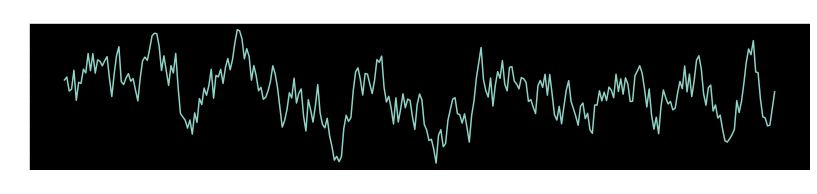

6.449100781650826e-06

In [252]:
φ = 0.8; µ = 0.; tm = 300; yt = [ np.random.rand() ]; 

fg,ax = plt.subplots( 1,1, figsize= (14,2.7) )  
for e_tm in range( tm ):
    𝜀t = random.uniform(-1,1)        
    yt.append( µ + φ*yt[e_tm] + 𝜀t )    
ax.plot( yt ); ax.set_title( 'φ = %4.2f'%(φ) );  plt.show()
adfuller( yt )[1]

Since p << 0.05, accepts `Null Hypothesis (Ho) - Stationarity` 

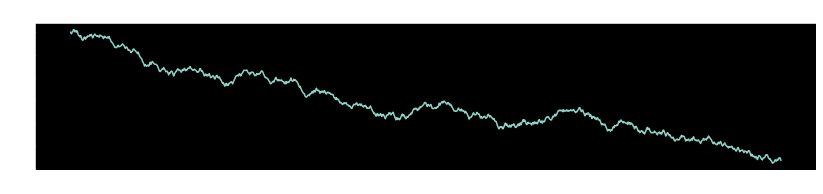

0.6104045415050051

In [293]:
φ = 1; µ =  0.0; tm = 1000; yt = [ np.random.rand() ]; 

fg,ax = plt.subplots( 1,1, figsize= (14,2.7) )

for e_tm in range( tm ):      
    𝜀t = random.uniform(-1,1)        
    yt.append( µ + φ*yt[e_tm] + 𝜀t )    
ax.plot( yt ); ax.set_title( 'φ = %4.2f'%(φ) );  plt.show()

adfuller( yt )[1]

Since p > 0.05, accepts `Alternate Hypothesis (Ha) - Random Walk` 

<br>

### Seasonal Adjustment During Tax Season

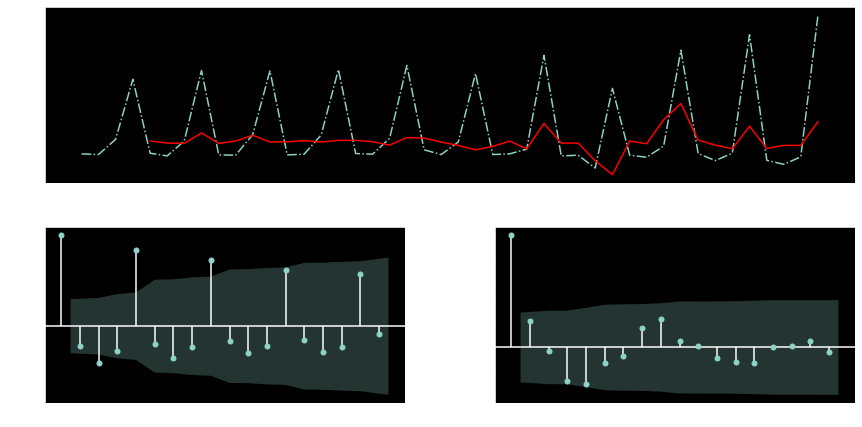

In [389]:
# seasonally adjust quarterly earnings by taking the lag-4 difference
hrb_sAdj_df = hrb_df.diff(4).dropna()

# plot the autocorrelation func of the seasonally adjusted series
warnings.filterwarnings( action= 'ignore' )

fg = plt.figure()
gs = GridSpec( 2,2, figure= fg, top= 1.5, right= 2, hspace= 0.25, wspace= 0.25 )
ax1 = fg.add_subplot( gs[0,:] )
ax2a = fg.add_subplot( gs[1,0] ); ax2b = fg.add_subplot( gs[1,1] )

ax1.plot( hrb_df, linestyle= '-.' ); ax1.plot( hrb_sAdj_df, color= 'red' )

plot_acf( x= hrb_df, alpha= 0.05, ax= ax2a  );    plot_acf( x= hrb_sAdj_df, alpha= 0.05, ax= ax2b  )
ax2a.set_title( 'AutoCorr of Original TimeSeries' );  ax2b.set_title( 'AutoCorr of Seasonal difference' )


plt.tight_layout()

By seasonally adjusting the series, we eliminated the seasonal pattern in the autocorrelation func.

<br>
<h2>Autoregressive (AR) Models</h2>

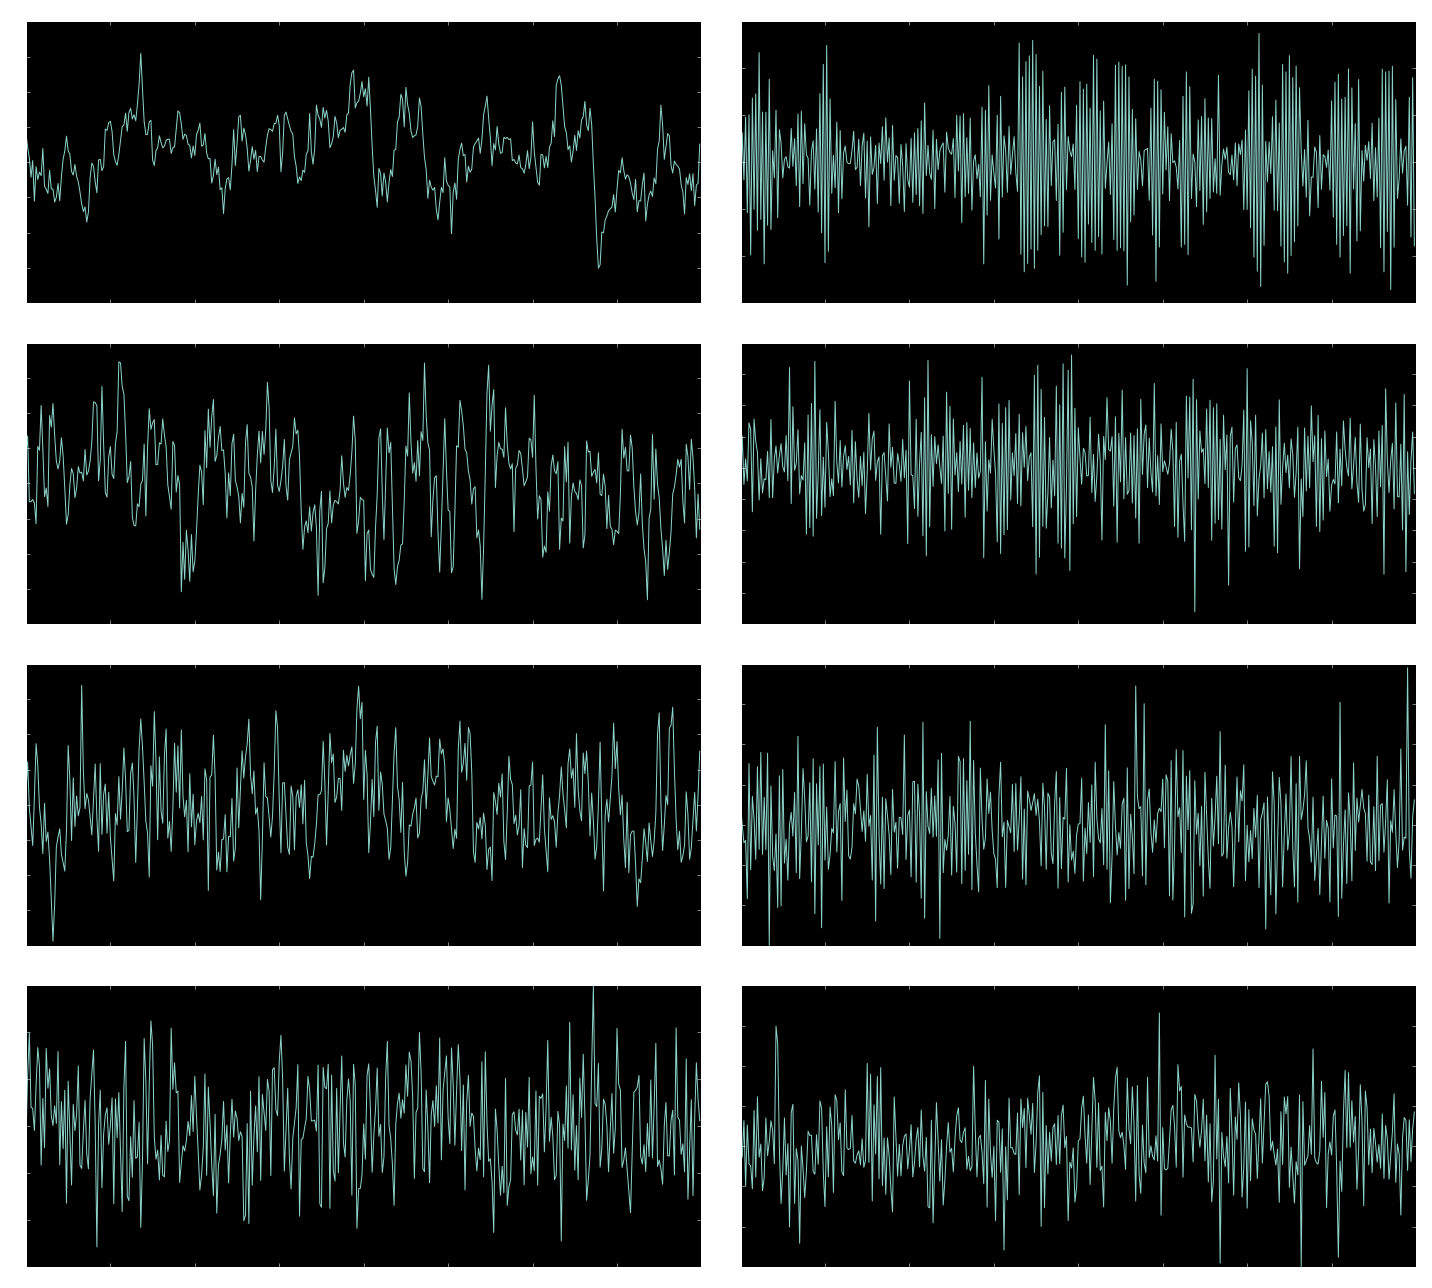

In [33]:
from statsmodels.tsa.arima_process import ArmaProcess

phi_ls = [ 0.9,-0.9, 0.7,-0.7, 0.5,-0.5, 0.2,-0.2  ]

fg,ax = plt.subplots( 4,2, figsize= (20,18) )

for e_ax, e_phi in zip( ax.flatten(), phi_ls ):
    
    ar_param = np.array( [1,-e_phi] );  ma_param = np.array([1])
    
    AR_obj = ArmaProcess( ar= ar_param, ma= ma_param, nobs= 100 )
    AR_simulation = AR_obj.generate_sample( nsample= 400 )
    
    e_ax.plot( AR_simulation )
    e_ax.set( title = f'φ = {e_phi}' )
    
    plt.tight_layout()

plt.show()

<br>

#### Compare the `AutoCorr func` for Several AR Time Series

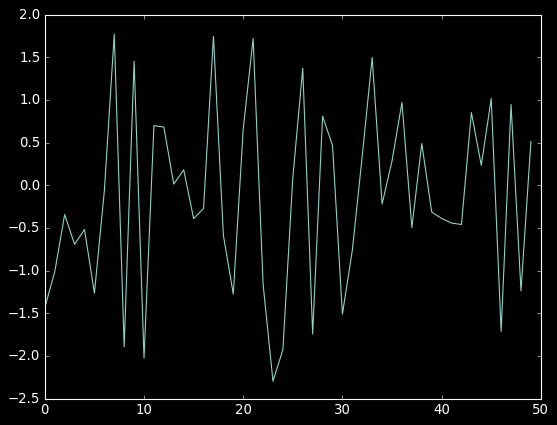

In [83]:
plt.plot(AR_simulation[:50])

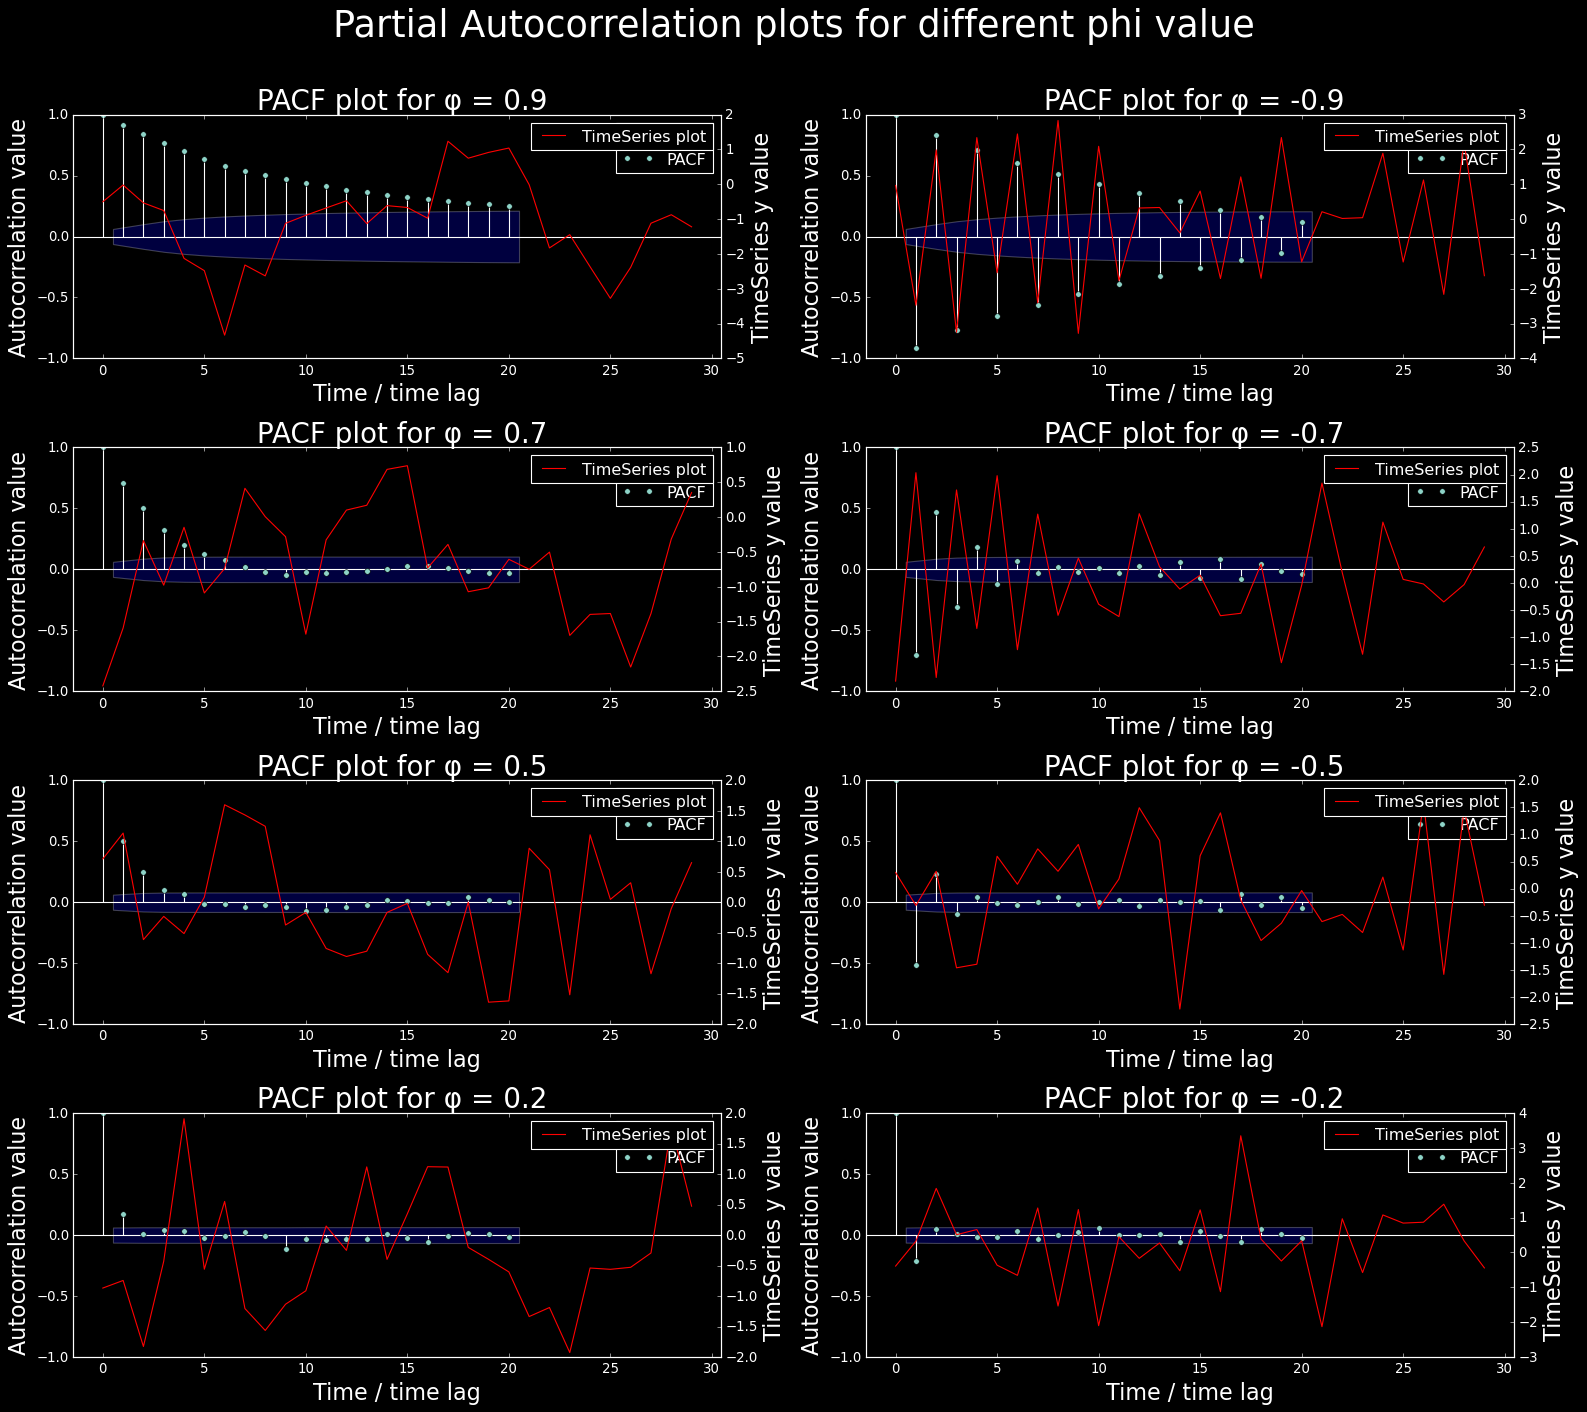

In [105]:
from statsmodels.tsa.arima_process import ArmaProcess

phi_ls = [ 0.9,-0.9, 0.7,-0.7, 0.5,-0.5, 0.2,-0.2  ]

fg,ax = plt.subplots( 4,2, figsize= (20,18) )

for e_ax, e_phi in zip( ax.flatten(), phi_ls ):
    
    ar_param = np.array( [1,-e_phi] );  ma_param = np.array([1])
    
    AR_obj = ArmaProcess( ar_param, ma= ma_param, nobs= 1000 )
    AR_simulation = AR_obj.generate_sample( nsample= 1000 )
    
    plot_acf( x= AR_simulation, alpha= 0.05, lags= 20, ax= e_ax, label= 'PACF' )
    e_tw_ax = e_ax.twinx()
    e_tw_ax.plot( AR_simulation[:30], c= 'red', label= 'TimeSeries plot' )
    
    e_ax.set_title( label = f' PACF plot for φ = {e_phi}', fontsize= 25 )
    e_ax.set_xlabel( xlabel = 'Time / time lag', fontsize= 20 )
    e_ax.set_ylabel( ylabel = 'Autocorrelation value', fontsize= 20 )
    e_tw_ax.set_ylabel( ylabel = 'TimeSeries y value', fontsize= 20 )
    
    e_ax.legend()
    e_tw_ax.legend()
    
fg.suptitle( 'Partial Autocorrelation plots for different phi value\n', fontsize= 33 )
plt.tight_layout()


plt.show()

### using slider widget

In [52]:
import ipywidgets as widgets

def param_widget_ts( phi= 0.5 ):
    fg,ax = plt.subplots( 1,2, figsize= (20,5) )
    
    # for +ve phi    
    ar_param = np.array( [1,-phi] );  ma_param = np.array([1])
    AR_obj = ArmaProcess( ar_param, ma= ma_param, nobs= 100 )
    AR_simulation = AR_obj.generate_sample( nsample= 200 )

    ax[0].plot( AR_simulation )
    ax[0].set( title = f'φ = {phi}' )
    
    # for -ve phi
    phi = -phi
    ar_param = np.array( [1,-phi] );  ma_param = np.array([1])
    AR_obj = ArmaProcess( ar_param, ma= ma_param, nobs= 100 )
    AR_simulation = AR_obj.generate_sample( nsample= 200 )

    plot_acf( x= AR_simulation, alpha= 0.05, lags= 20, ax= ax[1] )     
    ax[1].plot( AR_simulation )
    ax[1].set( title = f'φ = {phi}' )
      
    plt.tight_layout();     plt.show();
    
def param_widget_acf( phi= 0.5 ):
    fg,ax = plt.subplots( 1,2, figsize= (20,5) )
    
    # for +ve phi    
    ar_param = np.array( [1,-phi] );  ma_param = np.array([1])
    AR_obj = ArmaProcess( ar_param, ma= ma_param, nobs= 100 )
    AR_simulation = AR_obj.generate_sample( nsample= 400 )

    plot_acf( x= AR_simulation, alpha= 0.05, lags= 20, ax= ax[0] )      
    ax[0].set( title = f'φ = {phi}' )
    
    # for -ve phi
    phi = -phi
    ar_param = np.array( [1,-phi] );  ma_param = np.array([1])
    AR_obj = ArmaProcess( ar_param, ma= ma_param, nobs= 100 )
    AR_simulation = AR_obj.generate_sample( nsample= 400 )

    plot_acf( x= AR_simulation, alpha= 0.05, lags= 20, ax= ax[1] )      
    ax[1].set( title = f'φ = {phi}' )
      
    plt.tight_layout();     plt.show();    

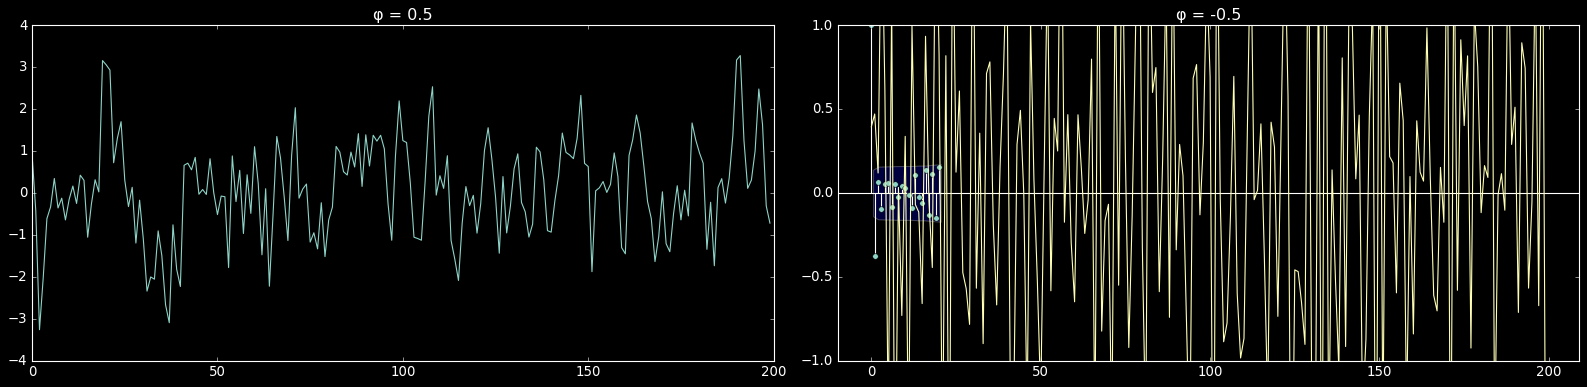

In [66]:
# !pip install ipywidgets
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !jupyter nbextension enable --machine-learning-conda --py widgetsnbextension
# import dark_backgorunds as widgets
plt.style.use('dark_background')

widgets.interact( param_widget_ts, phi= (0.0,1.0) );
# widgets.interact( param_widget_acf, phi= (0.0,1.0) );

<br>

<h4>Estimating AR Model</h4>

In [6]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

In [9]:
# data prep: simulate Arma data for φ = 0.9

ar_param = np.array( [1,-1 * 0.9] ); ma_param =  np.array([1])

Arma_obj = ArmaProcess( ar= ar_param, ma= ma_param, nobs= 100 )
AR_simulation_data = Arma_obj.generate_sample( nsample= 400 )

In [8]:
# model fit
arimaModel_fit1 = ARIMA( AR_simulation_data, order= (1,0,0) ).fit()

print( arimaModel_fit1.summary() )
print(f'\n\nWhen the true φ = 0.9, the estimate of phi & the constant µ are: {arimaModel_fit1.params[:2]}' )

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -556.286
Date:                Sat, 12 Jun 2021   AIC                           1118.573
Time:                        13:27:44   BIC                           1130.547
Sample:                             0   HQIC                          1123.315
                                - 400                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5089      0.343      1.486      0.137      -0.162       1.180
ar.L1          0.8589      0.025     34.903      0.000       0.811       0.907
sigma2         0.9419      0.065     14.538      0.0

<br>
<h4>Forecasting with an AR Model</h4>   

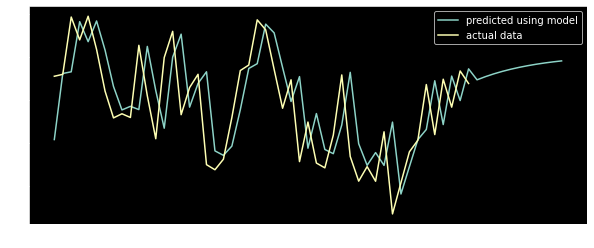

In [13]:
arimaModel_fit2 = ARIMA( AR_simulation_data, order= (1,0,0) ).fit()

## Since AR_simulation_data is an array and not a timeseries, the start & end arguments should refer to the index,
# not a date as
start_indx, end_indx = 350,410

predict_y =  arimaModel_fit2.predict( start= start_indx, end= end_indx )

fg,ax = plt.subplots( figsize= (10,4) )
ax.plot( predict_y, label= 'predicted using model' )
ax.plot( AR_simulation_data[start_indx:end_indx], label= 'actual data' )

ax.legend(); plt.show()

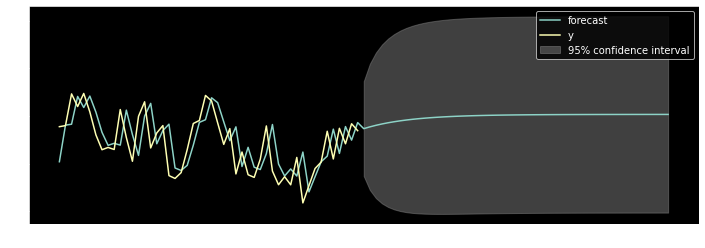

In [15]:
# using on the verge of deprecation ARMA func
import warnings; warnings.filterwarnings( action= 'ignore' )

arimaModel_fit2 = ARMA( AR_simulation_data, order= (1,0) ).fit()

start_indx, end_indx = 350, 450

fg,ax = plt.subplots( figsize= (12,4) )
predict_y =  arimaModel_fit2.plot_predict( start= start_indx, end= end_indx, ax= ax )

plt.show()

<br>

#### Forecast Interest Rates


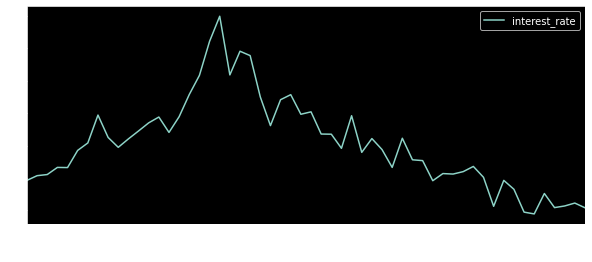

In [16]:
interestRate_df = pd.read_csv( 'datasets/us10y.csv', parse_dates= ['date'], index_col= 'date' )

interestRate_df.plot( figsize= (10,4) );

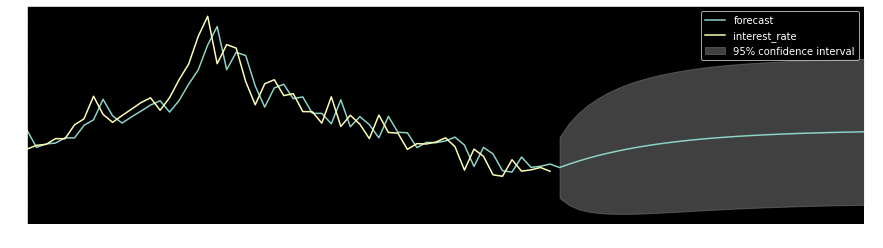

In [17]:
import warnings; warnings.filterwarnings( action= 'ignore' )

# Forecast interest rates using an AR(1) model
armaModel_fit1 = ARMA( interestRate_df, order= (1,0) ).fit()

# Plot the in-sample and out-of-sample forecasts of the data
fg,ax = plt.subplots( figsize= (15,4) )

armaModel_fit1.plot_predict( start= 0, end= '2050', ax= ax )
plt.show()

#### Compare AR Model with Random Walk

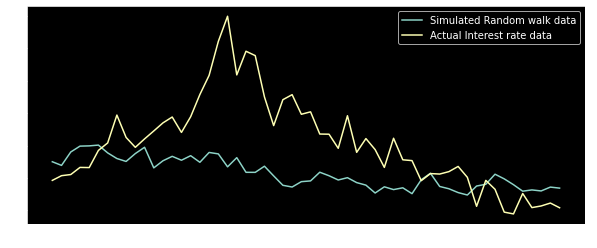

In [20]:
simu_data = np.array(  [ 5., 4.77522278, 5.60354317, 5.96406402, 5.97965372, 6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928, 5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293, 5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587, 5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912, 3.54622069, 3.43999885, 3.77116252, 3.81727011,
                         4.35256176, 4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457, 3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806, 3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579, 2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347, 3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681, 3.37204482
                       ]  )

simu_df = pd.Series( data= simu_data, index= interestRate_df.index )

fg,ax = plt.subplots( figsize= (10,4) )

plt.plot( simu_df, label= 'Simulated Random walk data' )
plt.plot( interestRate_df, label= 'Actual Interest rate data' )

plt.legend(); plt.show()

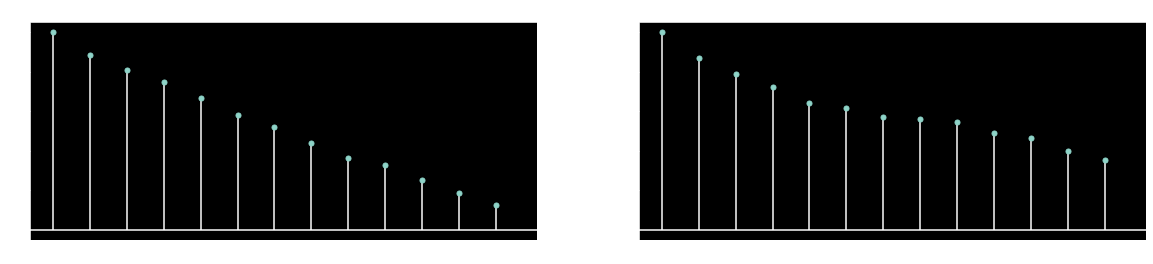

In [68]:
# Plot the autocorrelation of: interest rate series & the simulated random walk series side-by-side
fig, ax = plt.subplots( 1,2, figsize= (20,4) )

fig = plot_acf( interestRate_df, alpha= 1, lags= 12, ax= ax[0] )
fig = plot_acf( simu_df,         alpha= 1, lags= 12, ax= ax[1] )

ax[0].set_title( 'Interest Rate Data' ); ax[1].set_title( 'Simulated Random Walk Data' )

plt.show()

<br>

### Choosing the best Model: Partial AutoCorr func & Akaike Information Criteria ( AIC )

#### Estimate Order of Model: PACF

In [48]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

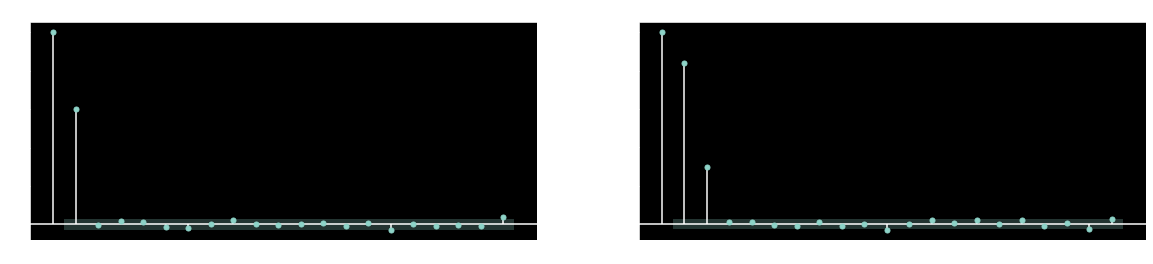

In [50]:
# simulate AR(1) with phi = +0.6

phi = 0.6
Arma_obj1 = ArmaProcess( ar= np.array([1,-phi]), ma= np.array([1]) )
AR_simu_data1 = Arma_obj1.generate_sample( nsample= 5000 )  

# Simulate AR(2) with phi1 = +0.6, phi2 = +0.3
phi1 = 0.6; phi2 = 0.3
Arma_obj2 = ArmaProcess( ar= np.array([1,-phi1,-phi2]), ma= np.array([1]) )
AR_simu_data2 = Arma_obj2.generate_sample( nsample= 5000 )

# plots
fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (20,4) )

plot_pacf( x= AR_simu_data1, lags= 20, ax= ax1 )
plot_pacf( x= AR_simu_data2, lags= 20, ax= ax2 )

plt.show()

Notice that the number of significant lags for the PACF indicate the order of the AR model.

<br>

<h4>Akaike Information Criterion ( AIC )</h4>

#### Estimate Order of Model: Information Criteria

In [51]:
from statsmodels.tsa.arima_model import ARMA

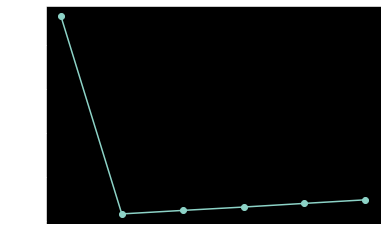

In [52]:
# Fit the data to an AR(p) for p = 0,...,7 , and save the BIC

order_no = 7

BIC = np.zeros(order_no)

for indx, _ in enumerate(BIC):
    armaModel_fit = ARMA( AR_simu_data2, order= (indx,0) ).fit()
    BIC[indx] = armaModel_fit.bic    

plt.plot( range(1,order_no), BIC[1:], marker= 'o' )
plt.show()

##### using list instead of np array (more efficient to append a list then fill up np.array)

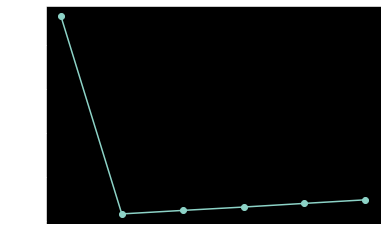

In [53]:
order_no = 7

BIC = []

for indx in range(order_no):
    armaModel_fit = ARMA( AR_simu_data2, order= (indx,0) ).fit()
    BIC.append( armaModel_fit.bic )

plt.plot( range(1,order_no), BIC[1:], marker= 'o' ); plt.show()

##### using list comprehension pythonic way!

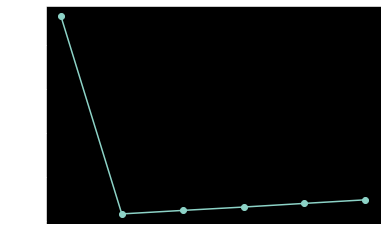

In [54]:
order_no = 7

BIC = [  ARMA( AR_simu_data2, order=(indx,0) ).fit().bic for indx in range(order_no)  ]

plt.plot( range(1,order_no), BIC[1:], marker= 'o' ); plt.show()

For an `AR(2)`, the `BIC` achieves its minimum at order = 2, which is what we expect.

<br>
<h3>Moving Average (MA) Model</h3>     

#### Simulate MA(1) Time Series

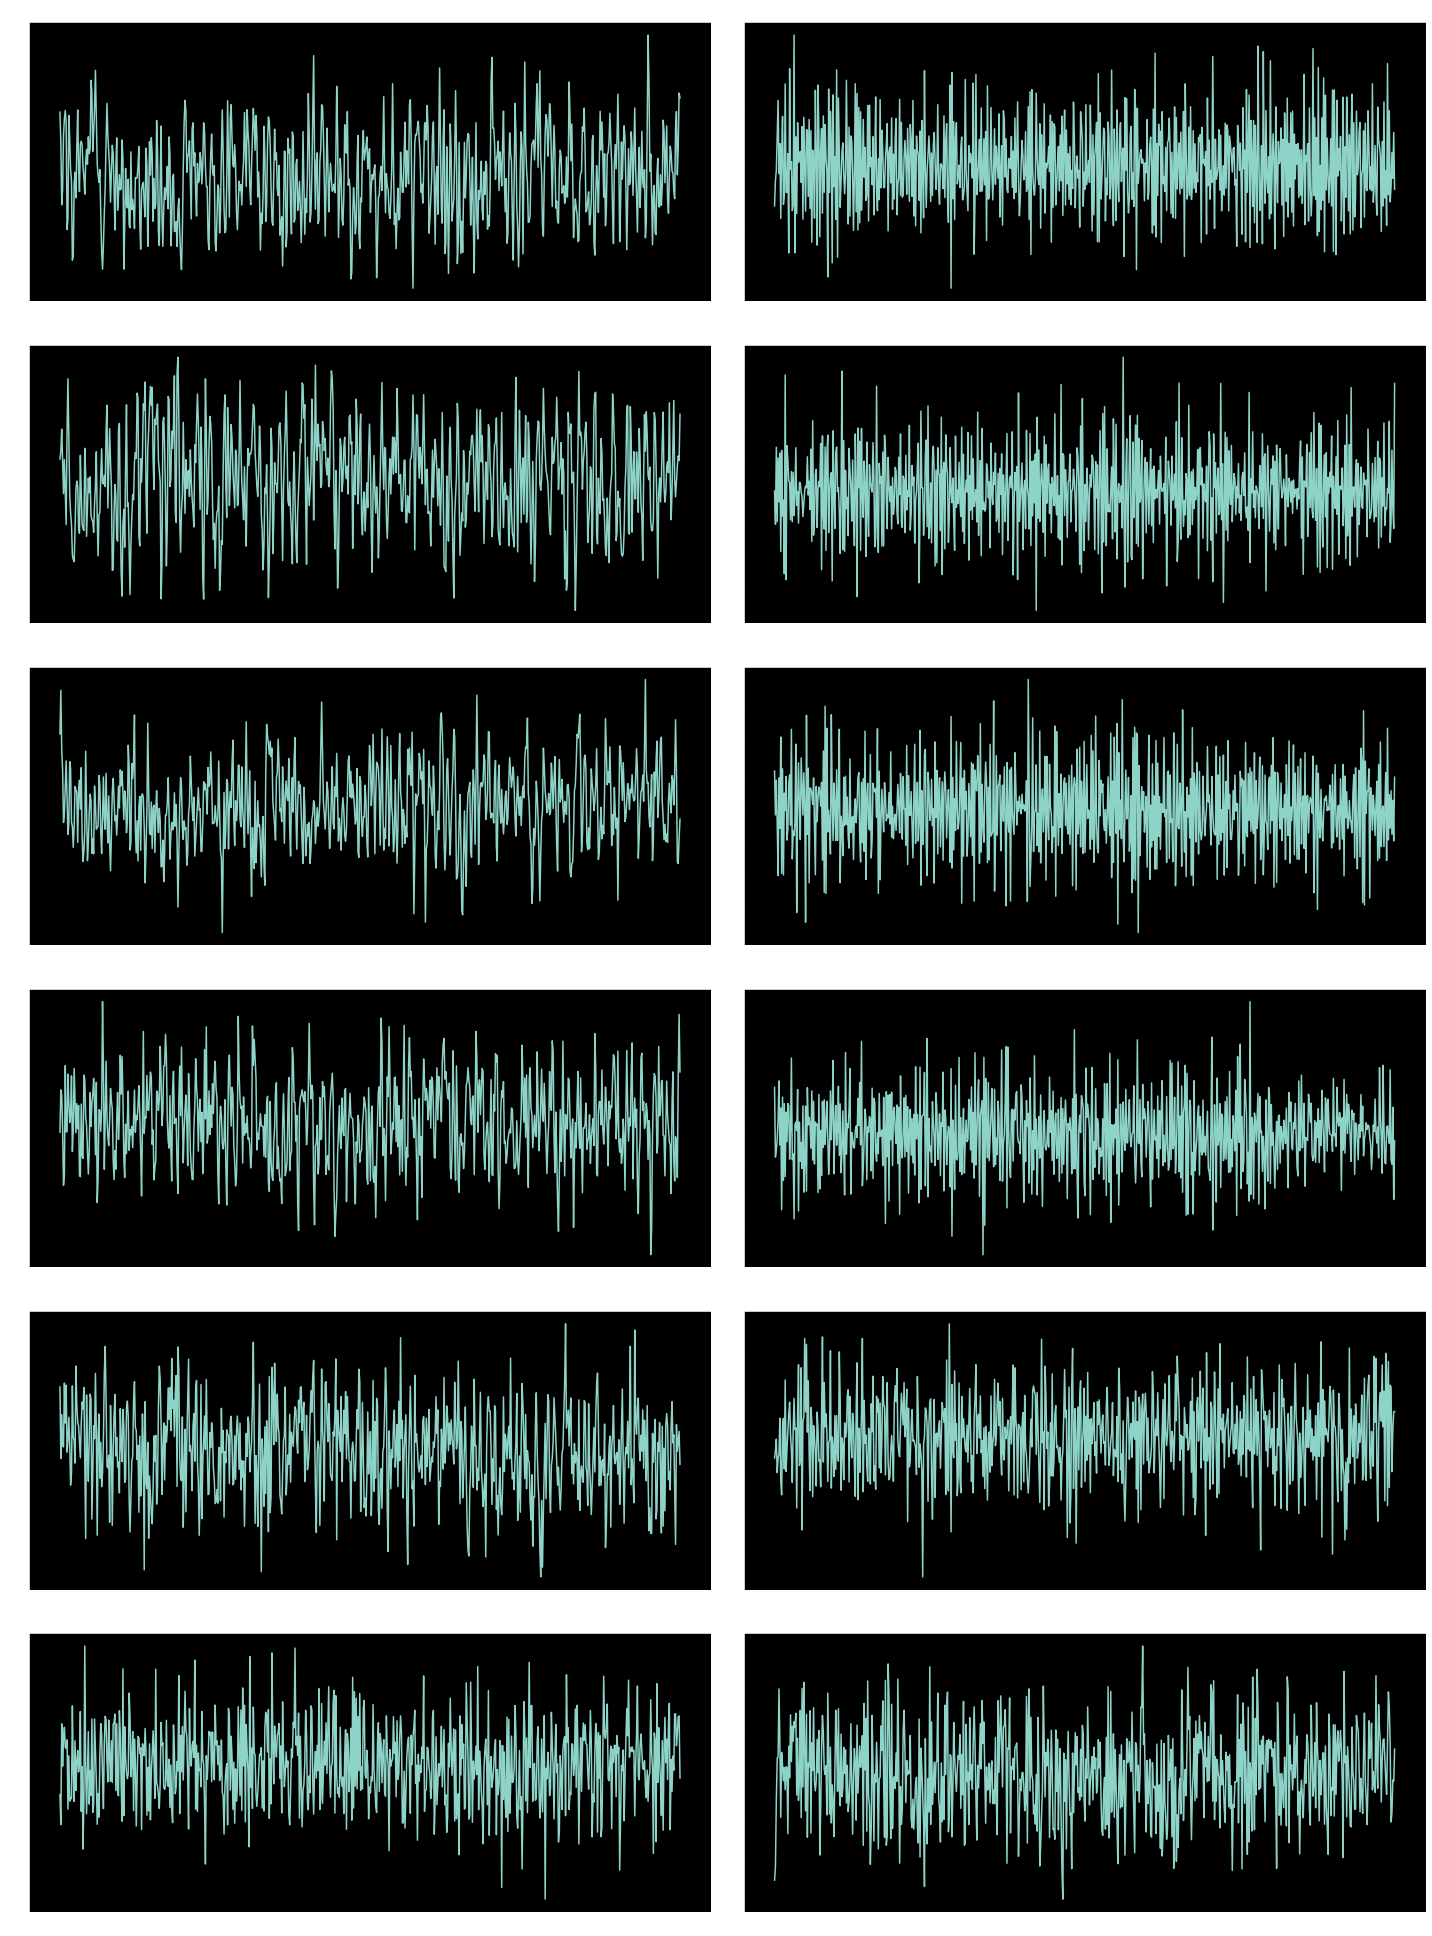

In [52]:
from statsmodels.tsa.arima_process import ArmaProcess

theta_ls = [ 1,-1, 0.9,-0.9, 0.7,-0.7, 0.5,-0.5, 0.2,-0.2, 0,0 ]

fg,ax = plt.subplots( int(len(theta_ls)/2),2,
                      figsize= ( 20,4.5*len(theta_ls)/2 ) )

for e_ax, e_theta in zip( ax.flatten(), theta_ls ):
    
    ar_param = np.array([1]);  ma_param = np.array( [1,e_theta] )
    
    MA_obj = ArmaProcess( ar= ar_param, ma= ma_param )
    MA_simu_data = MA_obj.generate_sample( nsample= 700 )
    
    e_ax.plot( MA_simu_data )
    e_ax.set( title = f'θ = {e_theta}' )
    
    plt.tight_layout()

plt.show()

In [112]:
import ipywidgets as widgets

def param_widget( theta= 0.5 ):
    
    fg,ax = plt.subplots( 1,2, figsize= (20,5) )
    
    # for +ve θ
    MA_obj = ArmaProcess( ar= np.array([1]), ma= np.array( [1,theta] ) )
    MA_simu_data = MA_obj.generate_sample( nsample= 300 )
    ax[0].plot( MA_simu_data )
    ax[0].set( title = f'θ = {theta}' )
    
    # for -ve θ
    theta = -theta
    MA_obj = ArmaProcess( ar= np.array([1]), ma= np.array( [1,theta] ) )
    MA_simu_data = MA_obj.generate_sample( nsample= 300 )
    ax[1].plot( MA_simu_data )
    ax[1].set( title = f'θ = {theta}' )
      
    plt.tight_layout(); plt.show()
    
import ipywidgets as widgets

widgets.interact( param_widget, theta= (0.1,1) );

interactive(children=(FloatSlider(value=0.5, description='theta', max=1.0, min=0.1), Output()), _dom_classes=(…

#### Compute the ACF for Several MA Time Series

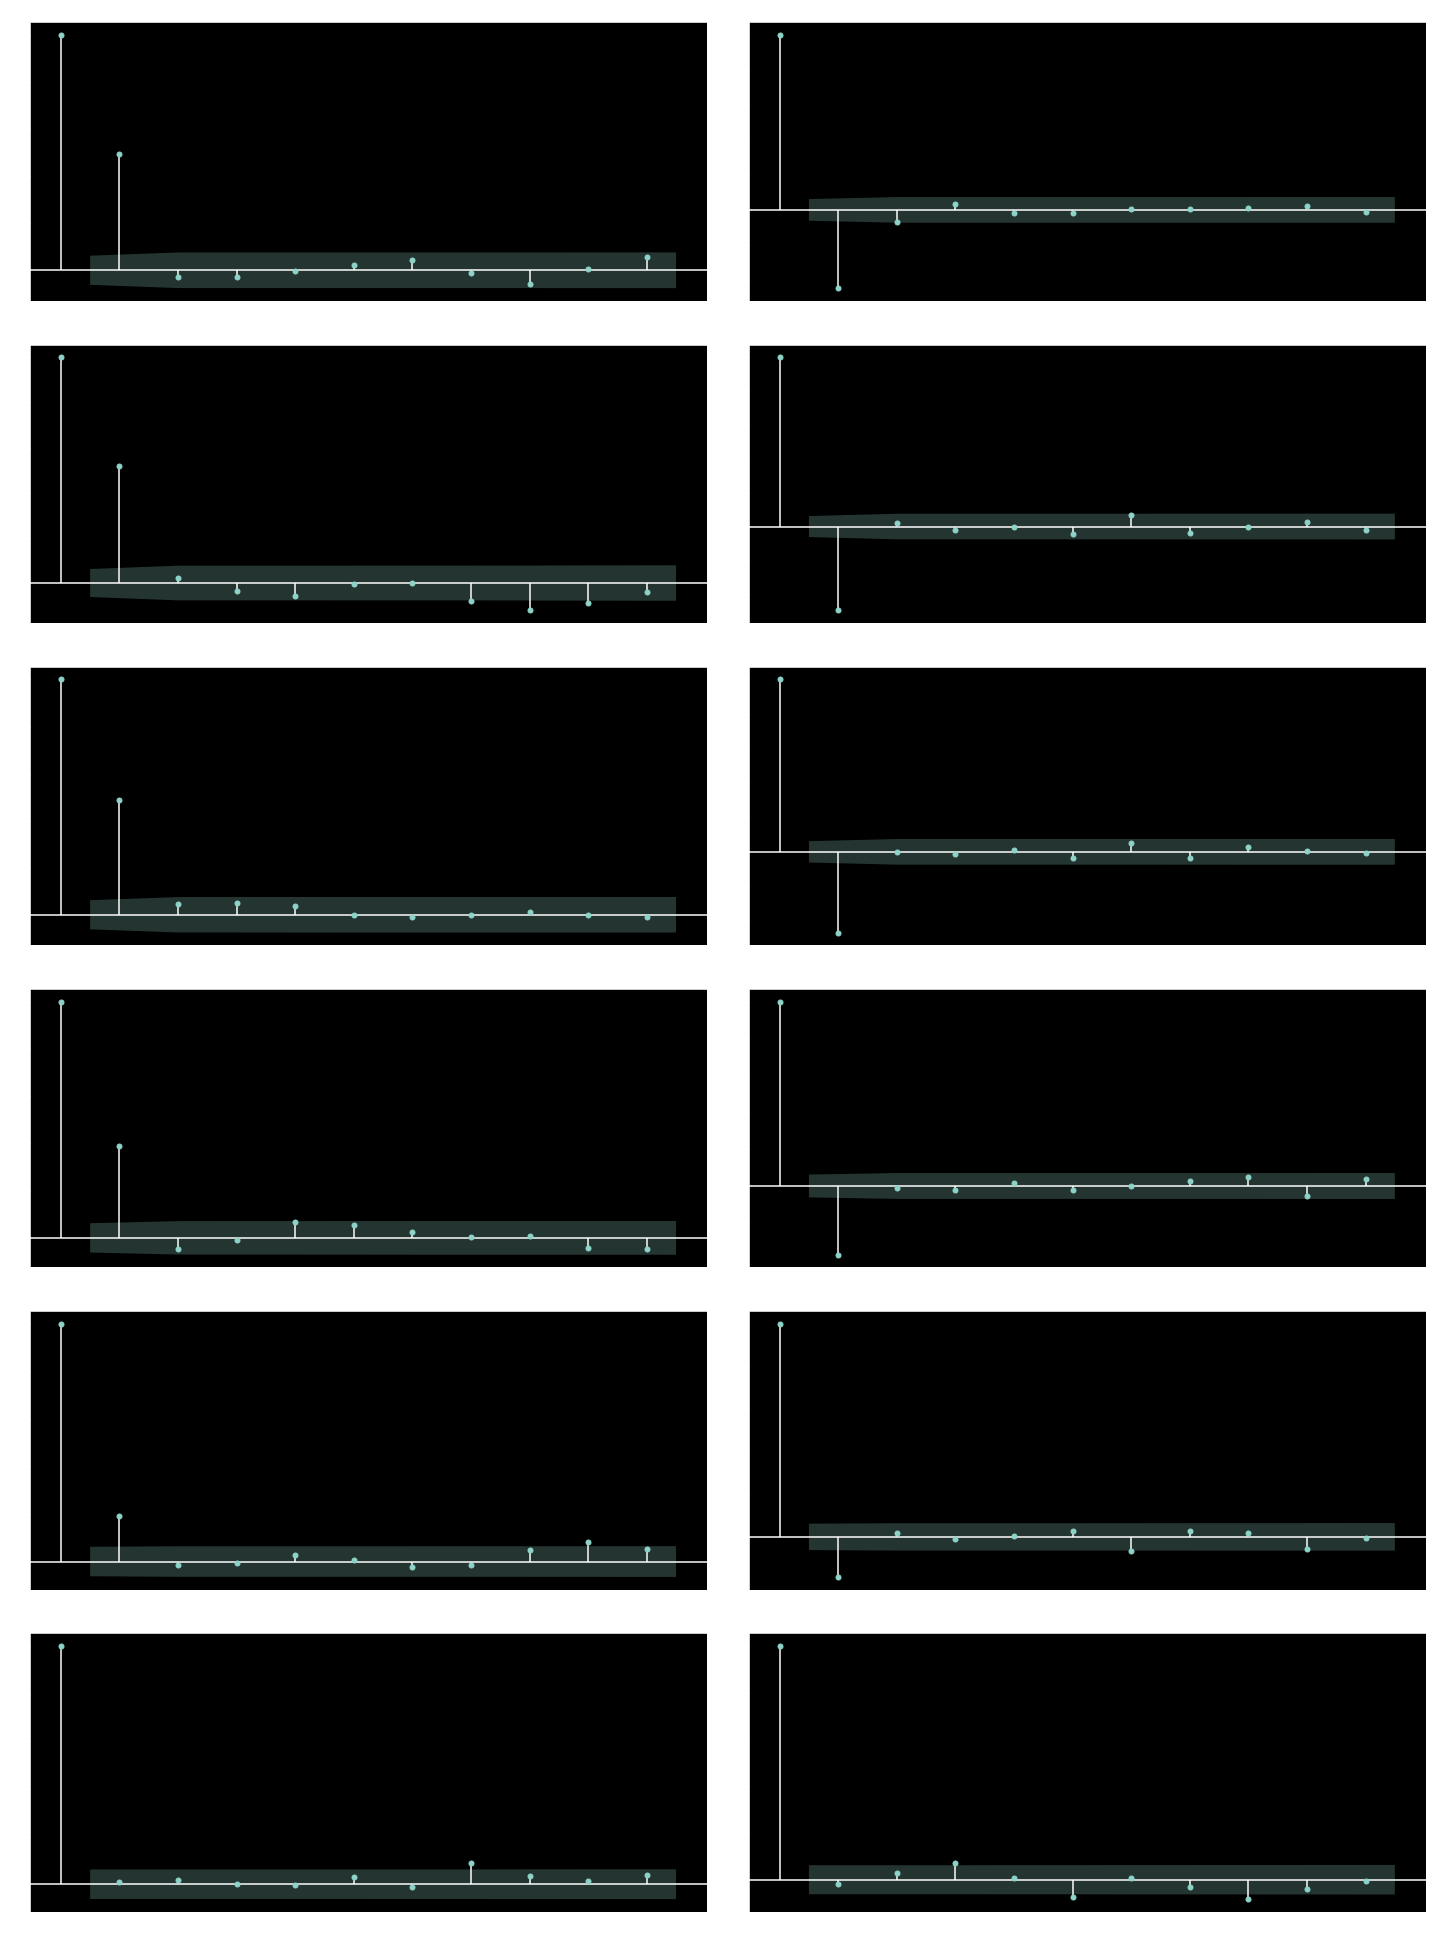

In [68]:
from statsmodels.tsa.arima_process import ArmaProcess

theta_ls = [ 1,-1, 0.9,-0.9, 0.7,-0.7, 0.5,-0.5, 0.2,-0.2, 0,0 ]

fg,ax = plt.subplots( int(len(theta_ls)/2),2,
                      figsize= ( 20,4.5*len(theta_ls)/2 ) )

for e_ax, e_theta in zip( ax.flatten(), theta_ls ):
    
    ar_param = np.array([1]);  ma_param = np.array( [1,e_theta] )
    
    MA_simu_data = ArmaProcess( ar= ar_param, ma= ma_param ).generate_sample( nsample= 1000 )
    
    plot_acf( MA_simu_data, lags= 10, ax= e_ax );
    e_ax.set( title = f'θ = {e_theta}' )     

plt.tight_layout()

<br>

### Estimating an MA Model

In [69]:
# data prep for simu data
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA as ARIMAmodel

theta = -0.9

ar_param = np.array([1]);  ma_param = np.array( [1,theta] )

MA_simu_data = ArmaProcess( ar= ar_param, ma= ma_param ).generate_sample( nsample= 1000 )

In [73]:
# model fit
import warnings; warnings.filterwarnings( action= 'ignore' )

maModel_fit = ARMA( MA_simu_data, order= (0,1) ).fit()

print( maModel_fit.summary() )
print(f'\n\nWhen the true θ = {theta}, the estimate of µ & θ are: {maModel_fit.params}' )

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1437.976
Method:                       css-mle   S.D. of innovations              1.018
Date:                Tue, 11 May 2021   AIC                           2881.952
Time:                        17:52:07   BIC                           2896.675
Sample:                             0   HQIC                          2887.548
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.003      1.030      0.303      -0.003       0.010
ma.L1.y       -0.9003      0.014    -62.133      0.000      -0.929      -0.872
                                    Roots           

### Forecasting with MA Model

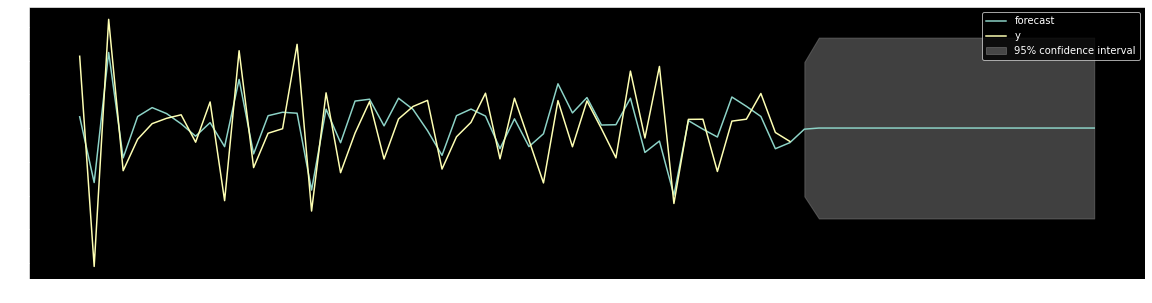

In [93]:
# Using the dveleoped MA(1) model: maModel_fit = ARMA( MA_simu_data, order= (0,1) ).fit()

print( maModel_fit )

fg,ax = plt.subplots( figsize= (20,5) )

maModel_fit.plot_predict( start= 950, end= 1020, ax= ax );

<br>
<h3>ARMA Models</h3>     

#### High Frequency Stock Prices

Higher frequency stock data is well modeled by an `MA(1)` process, so it's a nice application of the `MA(1)` model.

In [123]:
# data prep and clean

sprint_df = pd.read_csv( 'datasets/Sprint_Intraday.txt', header= None )
print( sprint_df.head(3), '\n' )

sprint_df.iloc[0,0] = 0

sprint_df.columns = [ 'date', 'close', 'col2', 'col3', 'col4', 'col5' ]

sprint_df.set_index( pd.to_numeric(sprint_df['date']), inplace= True )
sprint_df.drop( 'date', inplace= True, axis= 1 )
print( sprint_df.head(3) )

             0     1     2     3     4      5
0  a1504272600  8.29  8.30  8.29  8.30  32407
1            1  8.27  8.30  8.25  8.29  28467
2            2  8.28  8.28  8.28  8.28   1500 

      close  col2  col3  col4   col5
date                                
0      8.29  8.30  8.29  8.30  32407
1      8.27  8.30  8.25  8.29  28467
2      8.28  8.28  8.28  8.28   1500


In [139]:
# find missing index in sprint_df

# total minutes in a trading day

num_mints = int( ( pd.to_datetime('16:00') - pd.to_datetime('09:30') ).total_seconds()/60 )

missing_indx = set( range(num_mints) ) - set( sprint_df.index )    
print( f'missing index = {missing_indx}' )

# Fill in the missing rows setting the index equal to the full range(num_mints=391) and using forward fill
sprint_df = sprint_df.reindex( range(num_mints+1), method= 'ffill' )

missing index = {389}


<AxesSubplot:>

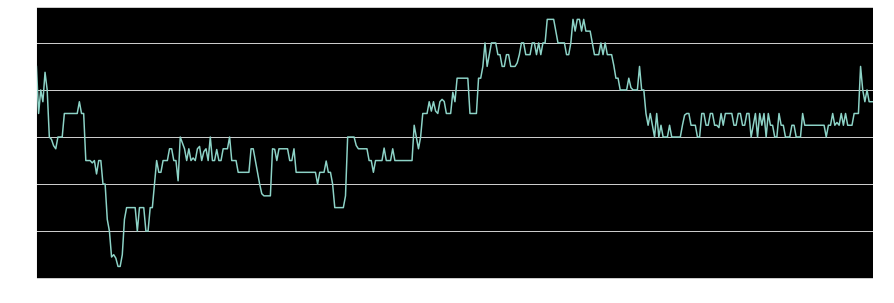

In [143]:
# Change the index to minutes

sprint_df.index = pd.date_range( start= '2017-09-01 9:30', end= '2017-09-01 16:00', freq= '1min' )

sprint_df['close'].plot( grid= True, figsize= (15,5) )

#### Applying an MA Model

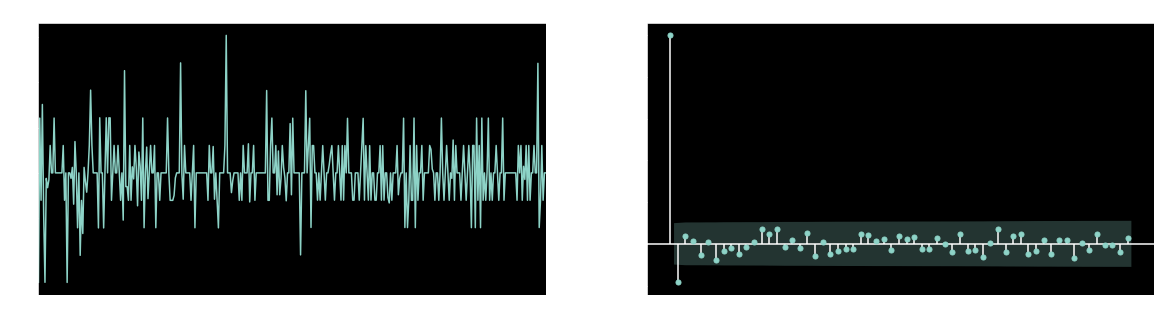

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                  390
Model:                     ARMA(0, 1)   Log Likelihood                 514.932
Method:                       css-mle   S.D. of innovations              0.065
Date:                Tue, 11 May 2021   AIC                          -1023.864
Time:                        19:39:14   BIC                          -1011.966
Sample:                    09-01-2017   HQIC                         -1019.148
                         - 09-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0003      0.003     -0.127      0.899      -0.006       0.005
ma.L1.close    -0.1831      0.049     -3.758      0.000      -0.279      -0.088
                                    Roots       

In [161]:
# Compute minute-to-minute returns from prices
sprint_pct_df = sprint_df['close'].pct_change().mul(100).dropna()

# plot the percent return and AutoCorr func
fg,(ax1,ax2) = plt.subplots( 1,2, figsize= (20,5) )
sprint_pct_df.plot( ax= ax1 );                                 plot_acf( sprint_pct_df, lags= 60, ax= ax2 );
plt.show()

# Fit the data to an MA(1) model
maModel_fit = ARMA( sprint_pct_df, order= (0,1) ).fit()

print( maModel_fit.summary() )


<br>

### Equivalence of `AR(1)` & `MA(∞)`

In [162]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

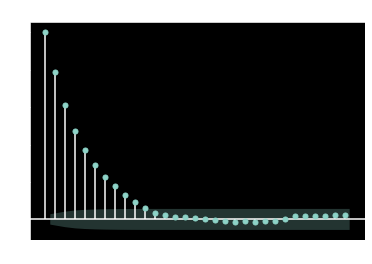

In [260]:
# Build a list MA parameters (θs)
thetas = [ 0.8**i for i in range(30) ]

ar_param = np.array([1])

simu_data_MA = ArmaProcess( ar= ar_param, ma= thetas ).generate_sample( nsample= 5000 )

# plot ACF
plot_acf( simu_data_MA, lags= 30 );

# is simalr to AR(1) AutoCorr plot (see above or immediately below)

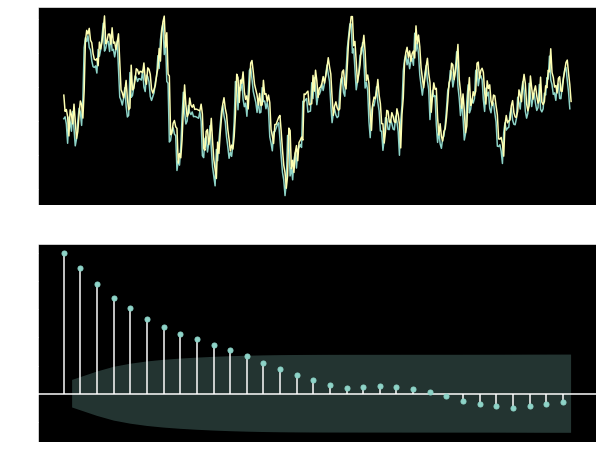

In [259]:
np.random.seed(50)

ar_param = np.array( [1,-0.9] ); ma_param= np.array([1])

simu_data_AR = ArmaProcess( ar= ar_param, ma= ma_param ).generate_sample( nsample= 400 )

arimaModel_fit = ARMA( simu_data_AR, order= (1,0) ).fit()

## estimate yhat using ARIMA model
mu = arimaModel_fit.params[0]; phi = arimaModel_fit.params[1]  

# yhat manual calc
yhat_manual = np.zeros( simu_data_AR.shape )
for indx in range(1,len(yhat)):
    yhat_manual[indx] = mu + phi * simu_data_AR[indx-1]

# yhat api calc
yhat_api = arimaModel_fit.predict(  )

# plotting yhat
fg,(ax1,ax2) = plt.subplots( 2,1, figsize= (10,8) )
ax1.plot( yhat_manual[1:] );  ax1.plot( yhat_api )
plot_acf( simu_data_AR, lags= 30, ax= ax2 )

plt.show()

<br>
<h2>Application of Time Series Modeling: Cointegrated Models</h2>

### Cointegration Models testing Manually

In [132]:
import statsmodels.api as sm
warnings.filterwarnings( action= 'ignore' )

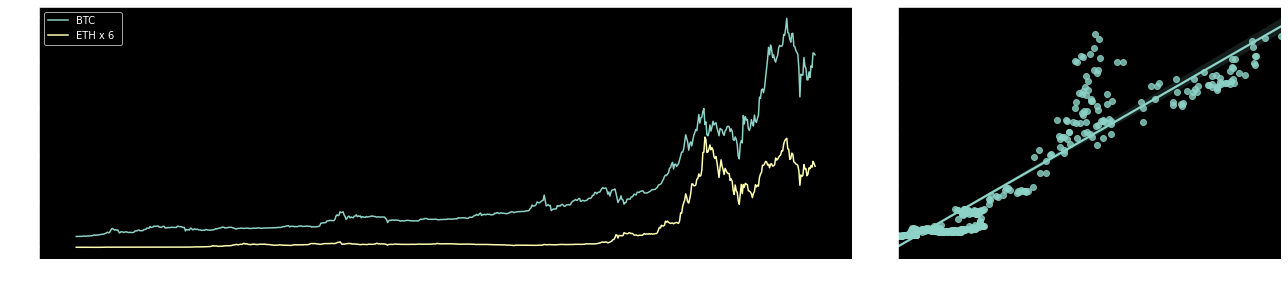

In [133]:
cryp_df = pd.read_csv( 'datasets/btc_eth.csv', parse_dates= [0], index_col= 0 )

btc_sr = cryp_df['btc'].squeeze();             eth_sr = cryp_df['eth'].squeeze()

fg = plt.figure()
gs = GridSpec( 1,3, figure= fg, top= 1, right= 3, hspace= 0.1, wspace= 0.12  )
ax1 = fg.add_subplot( gs[0:2] );              ax2 = fg.add_subplot( gs[2] )
ax1.plot( btc_sr, label= 'BTC' )   ;     ax1.plot( 6 * eth_sr, label= 'ETH x 6 ' )        # <-- multiplying by 6 just for visual purpose
ax1.legend()
sns.regplot( x= btc_sr, y= eth_sr, ax= ax2 )
plt.tight_layout(); plt.show()

#### Regression: ` BTC = m * ETH + c `

In [134]:
# add a constant coeff (c) colm
X_ETH = eth_sr;   Y_BTC = btc_sr
X_ETH = sm.add_constant( data= eth_sr )

# regression model fit
regressionModel_fit = sm.OLS( Y_BTC, X_ETH ).fit()

print( regressionModel_fit.summary() )

c,m = regressionModel_fit.params

                            OLS Regression Results                            
Dep. Variable:                    btc   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     6725.
Date:                Thu, 17 Jun 2021   Prob (F-statistic):               0.00
Time:                        03:17:41   Log-Likelihood:                -5293.4
No. Observations:                 732   AIC:                         1.059e+04
Df Residuals:                     730   BIC:                         1.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        528.7013     14.366     36.802      0.0

#### Check whether BTC & ETH are cointegrated using `Augmented Dickey-Fuller test`


ADF Statistic (tValue): -3.15    |    pValue: 0.02
The TimeSeries is Stationary not a Random Walk

ADF Statistic (tValue): -3.15    |    pValue: 0.02
The TimeSeries is Stationary not a Random Walk

ADF Statistic (tValue): -0.37    |    pValue: 0.92
The TimeSeries is NOT Stationary but a Random Walk


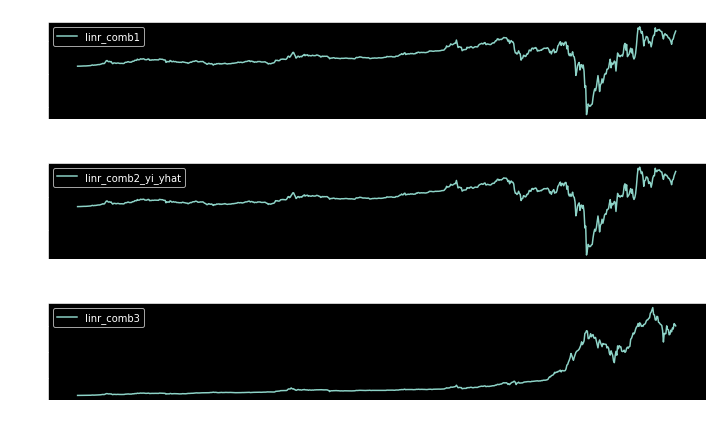

In [135]:
# linr combns

linr_comb1 = Y_BTC - ( m * X_ETH['eth'] )
linr_comb2_yi_yhat = Y_BTC - ( m * X_ETH['eth'] + c )   #<- Most proper linear combination
linr_comb3 = Y_BTC + ( m * X_ETH['eth'] + c )      # line comb but plus

# ADF test
augDF_test = adfuller_test( linr_comb1 )
augDF_test = adfuller_test( linr_comb2_yi_yhat )
augDF_test = adfuller_test( linr_comb3 )

data_to_plot_ls = [ 'linr_comb1', 'linr_comb2_yi_yhat', 'linr_comb3' ]
title_ls = [  'Statistically correct Linear Combination',  'Statistically correct Linear Combination', 
              'Statistically INCORRECT Linear Combination' ]
n_row = len(data_to_plot_ls)

fg,ax = plt.subplots( n_row,1, figsize= (10,2*n_row) )

for idx,(e_ax,e_data, e_title) in enumerate(  zip(ax.flatten(),data_to_plot_ls,title_ls)  ):
    e_ax.plot( eval(e_data), label= e_data )
    e_ax.set_title( e_title ); e_ax.legend( )
    
plt.tight_layout(); plt.show()

    Since pValue < 0.05 for the correct linear combinations (1st two), we accept Ho that the linr combn is Stationary --> the two timeSeries     are Cointegrated.

### Cointegration Models testing using library func

In [51]:
from statsmodels.tsa.stattools import coint

In [53]:
coint_result = coint( eth_sr, btc_sr )

print( f'The pValue: {coint_result[1]}' )

The pValue: 0.022489538457703063


    Interpretation:
    Since pValue < 0.05, we accept Null hypothesis (Ho) that the linear combination is Stationary i.e. the two timeSeries are Cointegrated.


In [4]:
import re

def clean_text(str_var):    

    '''
    clean the text, useful for column header
    Arguments:
    str_var -- a string variable of any size

    Return:
    str_modf -- a cleaned string variable
    
    '''
    
    # lower case and revome begin & end space
    str_modf = str_var.lower().strip()    
    # replace all non word chars ( everything except letters and nos )
    str_modf = re.sub( pattern= r'[^\w\s]', repl= '_', string= str_modf )    
    # replace all runs of whitespace with '_'
    str_modf = re.sub( pattern= r'\s+', repl= '_', string= str_modf )    
    # repalce > 1 consecutive '_'
    str_modf = re.sub( pattern= r'[__]+', repl= '_', string= str_modf )   
    
    # remove begining and trailing _ : '__any_word____' --> 'any_word'
    def _remove_begin_end_(str_var):
        while True:
            if str_var[-1] == '_':
                str_var = str_modf[:len(str_modf)-1]
            else:                
                break                
        while True:
            if str_var[0] == '_':                            
                str_var = str_modf[1:len(str_modf)]
            else:                
                break                
        return(str_var)
    
    str_modf = _remove_begin_end_(str_modf)        
    
    return(str_modf)    

clean_colm_name = lambda df: [ clean_text(e_cNm) for e_cNm in df.columns ]

def set_Xticks_for_axes( ax_ls, minor_major = (10,50) ):
    '''
    sets the x axis' major & minor ticks distance
    ax = the axis obj, could be single ax obj, a list of axis objs, np array of axis objs
    minor_major = tuple for major and minor distance for x axis    
    '''
    from matplotlib.ticker import ( MultipleLocator, AutoMinorLocator )

    for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
        e_ax.xaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
        e_ax.xaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
        
def set_ticks_for_axes( ax_ls, x_y= 'x', minor_major= (10,50) ):
    '''
    sets the x axis' major & minor ticks distance
    x_y = the x or y axis
    ax = the axis obj, could be single ax obj, a list of axis objs, np array of axis objs
    minor_major = tuple for major and minor distance for x axis    
    '''
    from matplotlib.ticker import ( MultipleLocator, AutoMinorLocator )
    
    if x_y == 'x' or x_y != 'y':
        for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
            e_ax.xaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
            e_ax.xaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
    elif x_y == 'y':
        for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
            e_ax.yaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
            e_ax.yaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
            
def adfuller_test( ser ):
    adfuller_tests_result = adfuller( ser )
    print( '\nADF Statistic (tValue): {var1:5.2f}    |    pValue: {var2:4.2f}'\
           .format( var1=adfuller_tests_result[0], var2= adfuller_tests_result[1] )  )
    if ( adfuller_tests_result[1] >= 0.05 ): print( 'The TimeSeries is NOT Stationary but a Random Walk' )
    else: print( 'The TimeSeries is Stationary not a Random Walk' )
    return(  [ np.round(adfuller_tests_result[0],3), np.round(adfuller_tests_result[1],3) ] )

def adfuller_test_str( ser ):
    adfuller_tests_result = adfuller( ser )
    
    to_print = 'ADF Statistic (tValue): {var1:5.2f}    |    pValue: {var2:4.2f}'\
               .format( var1=adfuller_tests_result[0], var2= adfuller_tests_result[1] )

    if ( adfuller_tests_result[1] >= 0.05 ):   to_print += '   |   The TimeSeries is NOT Stationary but a Random Walk'
    else:                                      to_print += '   |   The TimeSeries is Stationary not a Random Walk'
    
    return( to_print )

from IPython.display import display_html

def display_side_by_side(*args):
    '''
    func to display pandas dfs side by side
    input: dfs
    '''
    html_str = ''
    for df in args:
        html_str += df.to_html( )
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )  
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )   
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )        
    display_html(  html_str.replace( "table", "table style= 'display:inline'" ),
                   raw=True  )
    
def display_side_by_side_head(*args):
    '''
    func to display pandas dfs side by side
    input: dfs
    '''
    html_str = ''
    for df in args:
        html_str += df.head(5).to_html( )
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False ) 
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False )    
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False )        
    display_html(  html_str.replace( "table", "table style= 'display:inline'" ),
                   raw=True  )

In [5]:
import re

def clean_text(str_var):    

    '''
    clean the text, useful for column header
    Arguments:
    str_var -- a string variable of any size

    Return:
    str_modf -- a cleaned string variable
    
    '''
    
    # lower case and revome begin & end space
    str_modf = str_var.lower().strip()    
    # replace all non word chars ( everything except letters and nos )
    str_modf = re.sub( pattern= r'[^\w\s]', repl= '_', string= str_modf )    
    # replace all runs of whitespace with '_'
    str_modf = re.sub( pattern= r'\s+', repl= '_', string= str_modf )    
    # repalce > 1 consecutive '_'
    str_modf = re.sub( pattern= r'[__]+', repl= '_', string= str_modf )   
    
    # remove begining and trailing _ : '__any_word____' --> 'any_word'
    def _remove_begin_end_(str_var):
        while True:
            if str_var[-1] == '_':
                str_var = str_modf[:len(str_modf)-1]
            else:                
                break                
        while True:
            if str_var[0] == '_':                            
                str_var = str_modf[1:len(str_modf)]
            else:                
                break                
        return(str_var)
    
    str_modf = _remove_begin_end_(str_modf)        
    
    return(str_modf)    

clean_colm_name = lambda df: [ clean_text(e_cNm) for e_cNm in df.columns ]

def set_Xticks_for_axes( ax_ls, minor_major = (10,50) ):
    '''
    sets the x axis' major & minor ticks distance
    ax = the axis obj, could be single ax obj, a list of axis objs, np array of axis objs
    minor_major = tuple for major and minor distance for x axis    
    '''
    from matplotlib.ticker import ( MultipleLocator, AutoMinorLocator )

    for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
        e_ax.xaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
        e_ax.xaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
        
def set_ticks_for_axes( ax_ls, x_y= 'x', minor_major= (10,50) ):
    '''
    sets the x axis' major & minor ticks distance
    x_y = the x or y axis
    ax = the axis obj, could be single ax obj, a list of axis objs, np array of axis objs
    minor_major = tuple for major and minor distance for x axis    
    '''
    from matplotlib.ticker import ( MultipleLocator, AutoMinorLocator )
    
    if x_y == 'x' or x_y != 'y':
        for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
            e_ax.xaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
            e_ax.xaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
    elif x_y == 'y':
        for e_ax in np.array(ax_ls).flatten():      #<-- making all list or single ax obj into np.array & then flattening it
            e_ax.yaxis.set_minor_locator( MultipleLocator( minor_major[0] ) )
            e_ax.yaxis.set_major_locator( MultipleLocator( minor_major[1] ) )
            
def adfuller_test( ser ):
    adfuller_tests_result = adfuller( ser )
    print( '\nADF Statistic (tValue): {var1:5.2f}    |    pValue: {var2:4.2f}'\
           .format( var1=adfuller_tests_result[0], var2= adfuller_tests_result[1] )  )
    if ( adfuller_tests_result[1] >= 0.05 ): print( 'The TimeSeries is NOT Stationary but a Random Walk' )
    else: print( 'The TimeSeries is Stationary not a Random Walk' )
    return(  [ np.round(adfuller_tests_result[0],3), np.round(adfuller_tests_result[1],3) ] )

def adfuller_test_str( ser ):
    adfuller_tests_result = adfuller( ser )
    
    to_print = 'ADF Statistic (tValue): {var1:5.2f}    |    pValue: {var2:4.2f}'\
               .format( var1=adfuller_tests_result[0], var2= adfuller_tests_result[1] )

    if ( adfuller_tests_result[1] >= 0.05 ):   to_print += '   |   The TimeSeries is NOT Stationary but a Random Walk'
    else:                                      to_print += '   |   The TimeSeries is Stationary not a Random Walk'
    
    return( to_print )

from IPython.display import display_html

def display_side_by_side(*args):
    '''
    func to display pandas dfs side by side
    input: dfs
    '''
    html_str = ''
    for df in args:
        html_str += df.to_html( )
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )  
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )   
        html_str += pd.DataFrame( [' ']*len(df), columns= [' '] ).to_html( index= False )        
    display_html(  html_str.replace( "table", "table style= 'display:inline'" ),
                   raw=True  )
    
def display_side_by_side_head(*args):
    '''
    func to display pandas dfs side by side
    input: dfs
    '''
    html_str = ''
    for df in args:
        html_str += df.head(5).to_html( )
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False ) 
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False )    
        html_str += pd.DataFrame( [' ']*5, columns= [' '] ).to_html( index= False )        
    display_html(  html_str.replace( "table", "table style= 'display:inline'" ),
                   raw=True  )